In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import seaborn as sns
import folium

# Exploration and initial clean-up on small sets

Import the dataset into pandas

In [2]:
df = pd.read_csv('/Users/sanjayroberts1/Desktop/data_science_tools1/sudeste.csv')

Save df to hdf for easy loading each time. (Tried saving to pickle but apparently there is a bug for saving large files to pickle in pandas)

In [3]:
df.to_hdf('weather.hdf','mydata',mode='w')

In [4]:
df = pd.read_hdf('weather.hdf','mydata')

Take a look at the data we are working with

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
wsid    int64
wsnm    object
elvt    float64
lat     float64
lon     float64
inme    object
city    object
prov    object
mdct    object
date    object
yr      int64
mo      int64
da      int64
hr      int64
prcp    float64
stp     float64
smax    float64
smin    float64
gbrd    float64
temp    float64
dewp    float64
tmax    float64
dmax    float64
tmin    float64
dmin    float64
hmdy    float64
hmax    float64
hmin    float64
wdsp    float64
wdct    float64
gust    float64
dtypes: float64(20), int64(5), object(6)
memory usage: 2.3+ GB


In [6]:
df.describe()

wsid          elvt           lat           lon            yr  \
count  9.779168e+06  9.779168e+06  9.779168e+06  9.779168e+06  9.779168e+06   
mean   3.592531e+02  5.940923e+02 -2.023082e+01 -4.464590e+01  2.011164e+03   
std    3.901630e+01  3.980379e+02  3.172643e+00  4.882117e+00  3.207774e+00   
min    1.780000e+02  0.000000e+00 -2.496282e+01 -5.667732e+01  2.000000e+03   
25%    3.280000e+02  2.830000e+02 -2.239580e+01 -4.743410e+01  2.009000e+03   
50%    3.580000e+02  5.730000e+02 -2.075041e+01 -4.445378e+01  2.011000e+03   
75%    3.940000e+02  8.750000e+02 -1.891707e+01 -4.243575e+01  2.014000e+03   
max    4.230000e+02  1.758000e+03  0.000000e+00  0.000000e+00  2.016000e+03   

                 mo            da            hr          prcp           stp  \
count  9.779168e+06  9.779168e+06  9.779168e+06  1.407984e+06  9.779168e+06   
mean   6.521960e+00  1.575465e+01  1.150000e+01  9.366544e-01  8.804292e+02   
std    3.425538e+00  8.802154e+00  6.922190e+00  2.923291e+00  2.482650e+02   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.000000e+00  8.000000e+00  5.000000e+00  0.000000e+00  9.113000e+02   
50%    7.000000e+00  1.600000e+01  1.200000e+01  0.000000e+00  9.442000e+02   
75%    9.000000e+00  2.300000e+01  1.800000e+01  6.000000e-01  9.731000e+02   
max    1.200000e+01  3.100000e+01  2.300000e+01  1.000000e+02  1.050000e+03   

               smax          smin          gbrd          temp          dewp  \
count  9.779168e+06  9.779168e+06  5.670348e+06  9.779137e+06  9.778693e+06   
mean   8.803034e+02  8.798331e+02  1.176371e+03  2.047423e+01  1.472681e+01   
std    2.489171e+02  2.487716e+02  1.138754e+03  7.331125e+00  5.805413e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00 -3.800000e+00 -1.000000e+01   
25%    9.115000e+02  9.110000e+02  6.500000e+01  1.770000e+01  1.210000e+01   
50%    9.444000e+02  9.439000e+02  8.634270e+02  2.140000e+01  1.610000e+01   
75%    9.733000e+02  9.728000e+02  2.103000e+03  2.490000e+01  1.890000e+01   
max    1.050000e+03  1.050000e+03  1.158649e+04  4.490000e+01  4.270000e+01   

               tmax          dmax          tmin          dmin          hmdy  \
count  9.779142e+06  9.778858e+06  9.779134e+06  9.778361e+06  9.779168e+06   
mean   2.110503e+01  1.524025e+01  1.986418e+01  1.422089e+01  6.726667e+01   
std    7.545549e+00  5.866811e+00  7.134849e+00  5.777089e+00  2.654213e+01   
min   -3.200000e+00 -1.000000e+01 -8.500000e+00 -1.000000e+01  0.000000e+00   
25%    1.820000e+01  1.270000e+01  1.720000e+01  1.160000e+01  5.300000e+01   
50%    2.190000e+01  1.660000e+01  2.080000e+01  1.560000e+01  7.400000e+01   
75%    2.580000e+01  1.940000e+01  2.420000e+01  1.840000e+01  8.900000e+01   
max    4.500000e+01  4.480000e+01  4.500000e+01  4.490000e+01  1.000000e+02   

               hmax          hmin          wdsp          wdct          gust  
count  9.779156e+06  9.779124e+06  8.853607e+06  9.779168e+06  9.462694e+06  
mean   6.996991e+01  6.441965e+01  1.998156e+00  1.385991e+02  4.494015e+00  
std    2.643371e+01  2.656550e+01  1.618531e+00  1.052018e+02  2.981790e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    5.800000e+01  4.900000e+01  8.000000e-01  5.600000e+01  2.300000e+00  
50%    7.800000e+01  7.000000e+01  1.700000e+00  1.140000e+02  4.200000e+00  
75%    9.100000e+01  8.600000e+01  2.900000e+00  2.160000e+02  6.300000e+00  
max    1.000000e+02  1.000000e+02  1.980000e+01  3.600000e+02  5.000000e+01

Shape of the dataframe. We have about 10 million observations

In [7]:
df.shape

(9779168, 31)

Need to change mdct to index and to a datetime object

In [8]:
df = df.set_index('mdct')
df.index = pd.to_datetime(df.index)

How many NA values do we need to investigate?

In [9]:
df.isna().sum()

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64

## Investigate one station to get a bearing on how to clean

In [10]:
is_178 = df['wsid'] == 178
w_station_178 = df[is_178]

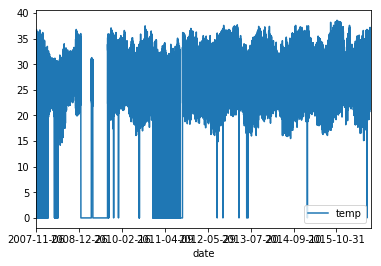

In [11]:
w_station_178.plot(x='date', y='temp')

16 years of temperature data does not plot well. Looks like we need to zoom in on a smaller subset. From this, we see that there is missing data (NAs) around year 2008-2010. Maybe the station wasn't funded and didn't report reading then? Also, lots of zero values for this station. The data stabilizes a bit better in the later years, hovering between 16C-37C.

Let's zoom in on about 2 weeks of hourly data for another station that has cleaner readings. 
About 2 weeks of data from sept 15 - sept 30, 2016 from station 384 in Rio de Janeiro

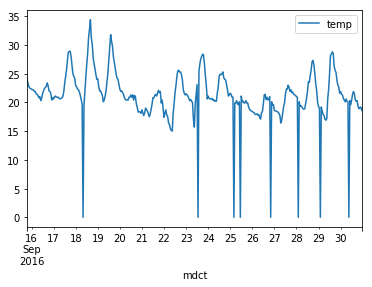

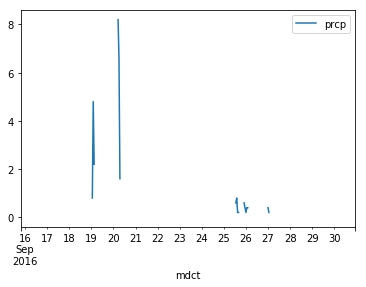

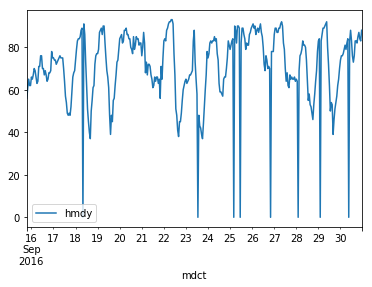

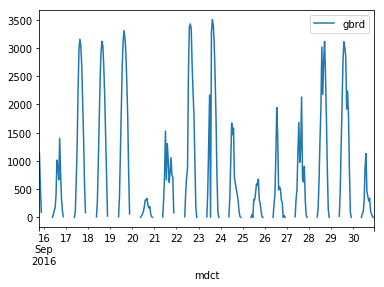

In [12]:
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(365)
station_384_tail_365 = station_384_tail_365.reset_index()
station_384_tail_365.plot(x='mdct', y='temp')
station_384_tail_365.plot(x='mdct', y='prcp')
station_384_tail_365.plot(x='mdct', y='hmdy')
station_384_tail_365.plot(x='mdct', y='gbrd')


Temperature and humidity varies correctly except for zero values.
Precipitation data is sparse and looks to only have readings when it rains, other than that the sensor reports NA values.
Solar radiation (gbrd) looks decent as well. Reporting values while the sun is out (daylight) and reporting NA when the sun is down (nighttime). We can even see that on the day it rains in the precipitation graph (20th - 21st), solar radiation is reporting low values, most likely due to cloud cover. 

Let's make the plots prettier and plot the data in tandem.

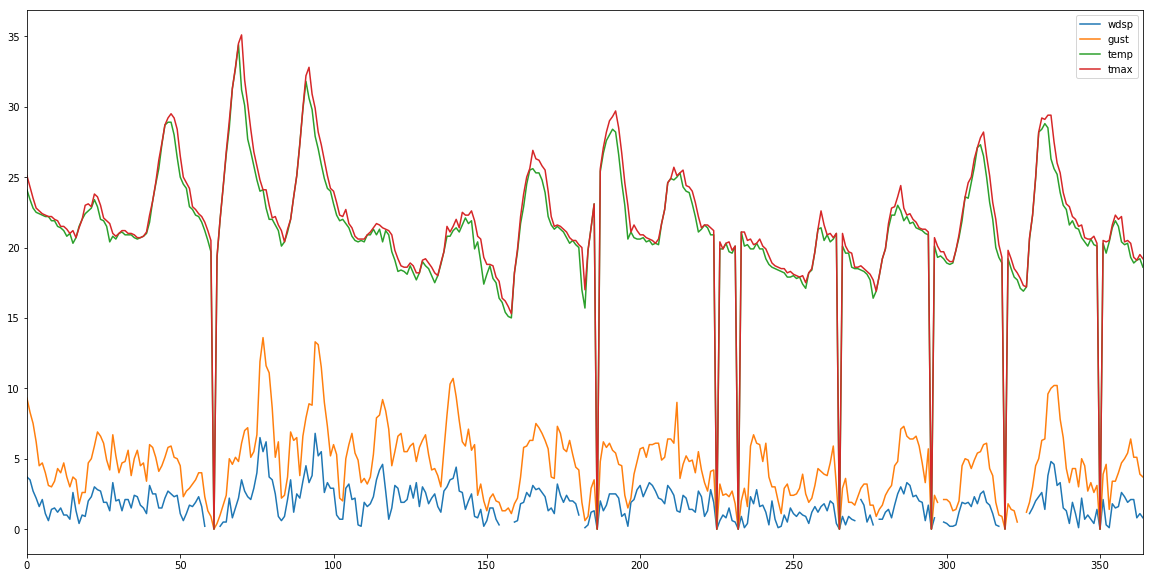

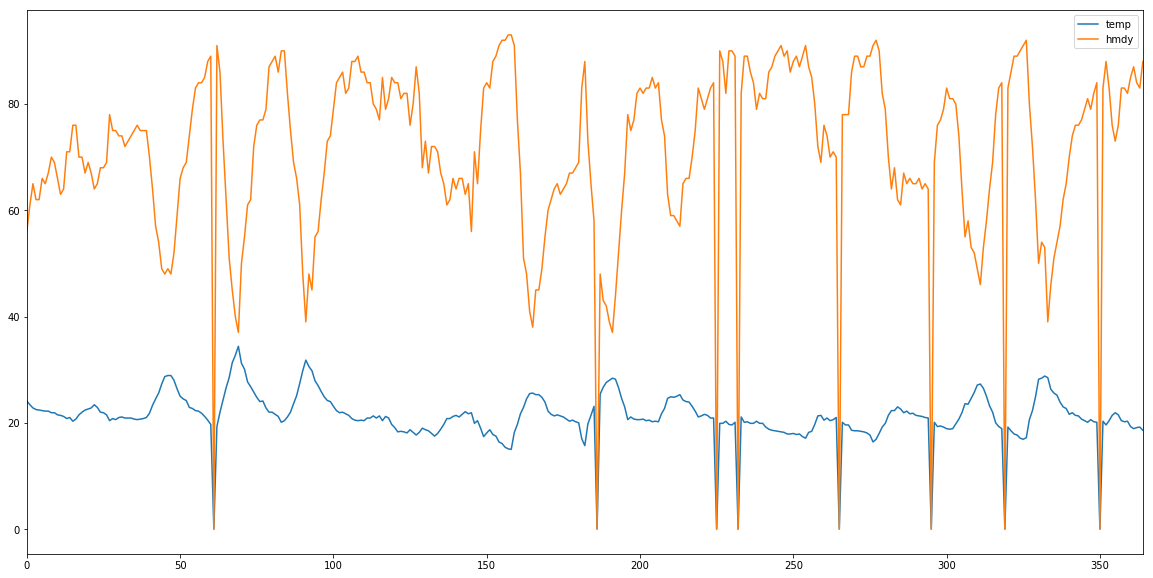

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
station_384_tail_365[['wdsp', 'gust', 'temp', 'tmax']].plot()
station_384_tail_365[['temp', 'hmdy']].plot()

# Interpolation - fill in the missing gaps
Let's look at just temperature and try to fill in the gaps so the data makes more sense. From the graph below, it doesn't make sense for the temperature to drop from 20C to 0C in the midst of an hour, so it makes more sense that a sensor reported incorrectly

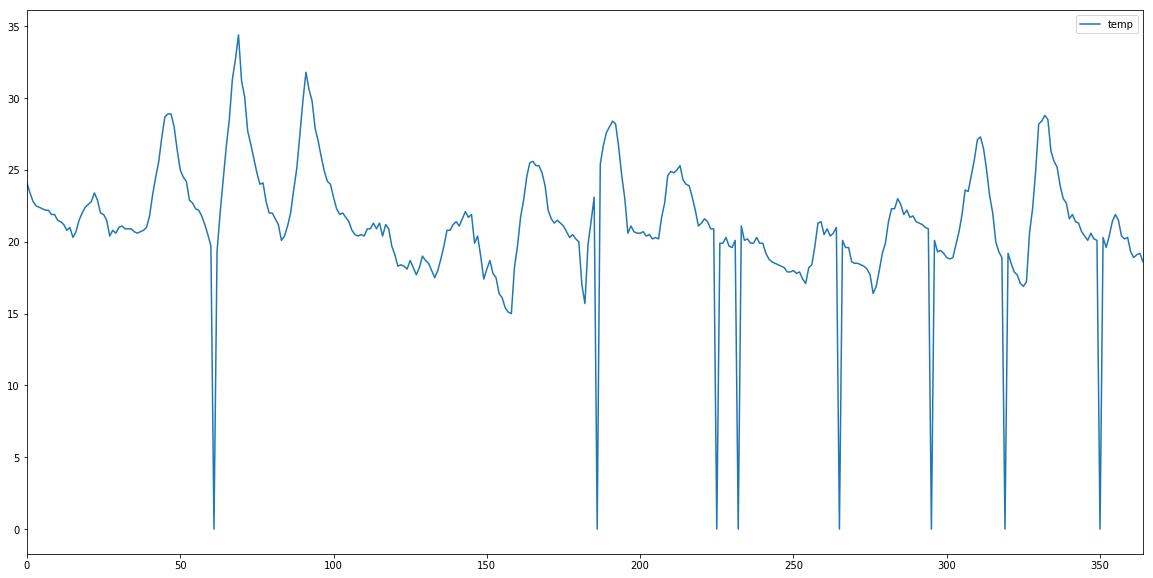

In [14]:
station_384_tail_365[['temp']].plot()

First, change all 0's to NaNs, then use interpolation to fill in missing values.

In [15]:
station_384_temp = station_384_tail_365['temp']
station_384_temp.replace(0, np.nan, inplace=True)

Graph pre-interpolation:

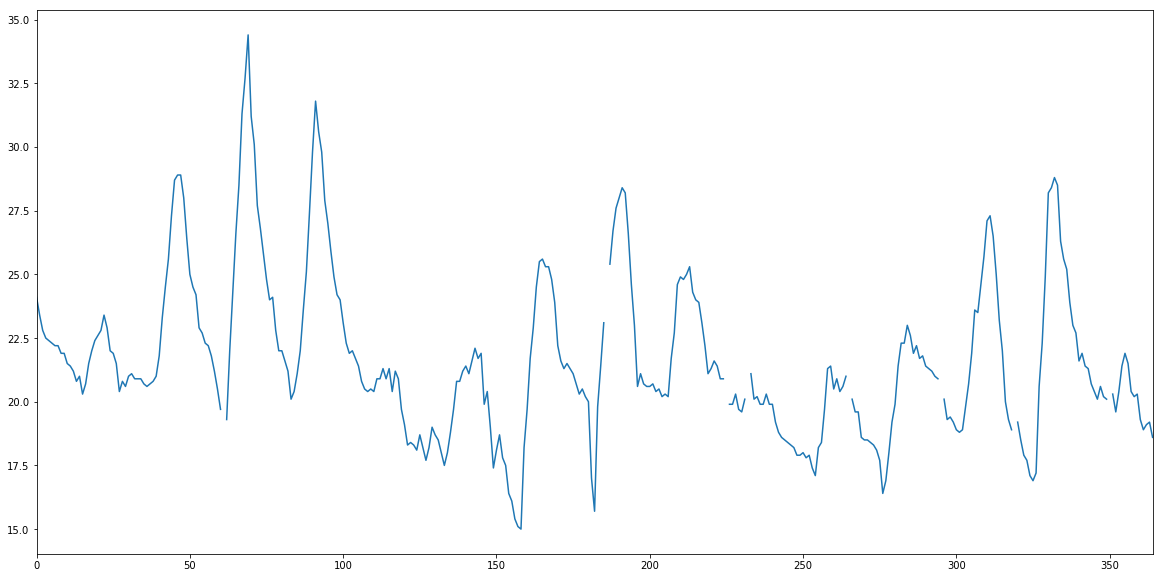

In [16]:
station_384_temp.plot()

Interpolate linearly

In [17]:
station_384_temp.interpolate('linear', inplace=True, limit_direction='both')

Plot post interpolation looks a lot better and fills in the missing holes nicely. This is a big assumption but I think it makes sense since most of the missing data is one hour here or there, so interpolating on small  holes seem appropriate.

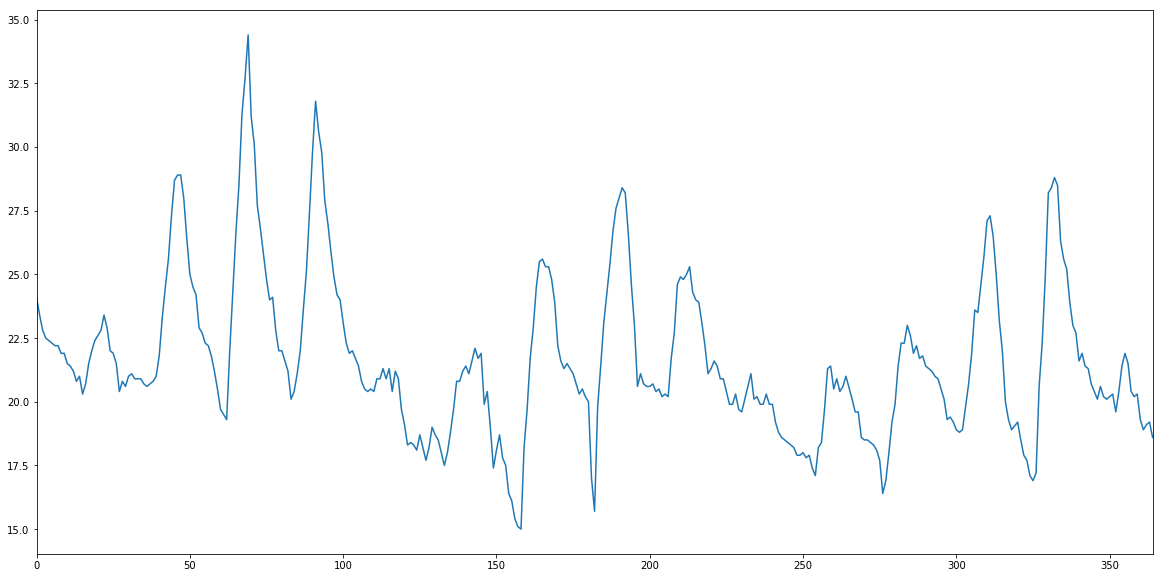

In [18]:
station_384_temp.plot()

Let's go down to data from one day 

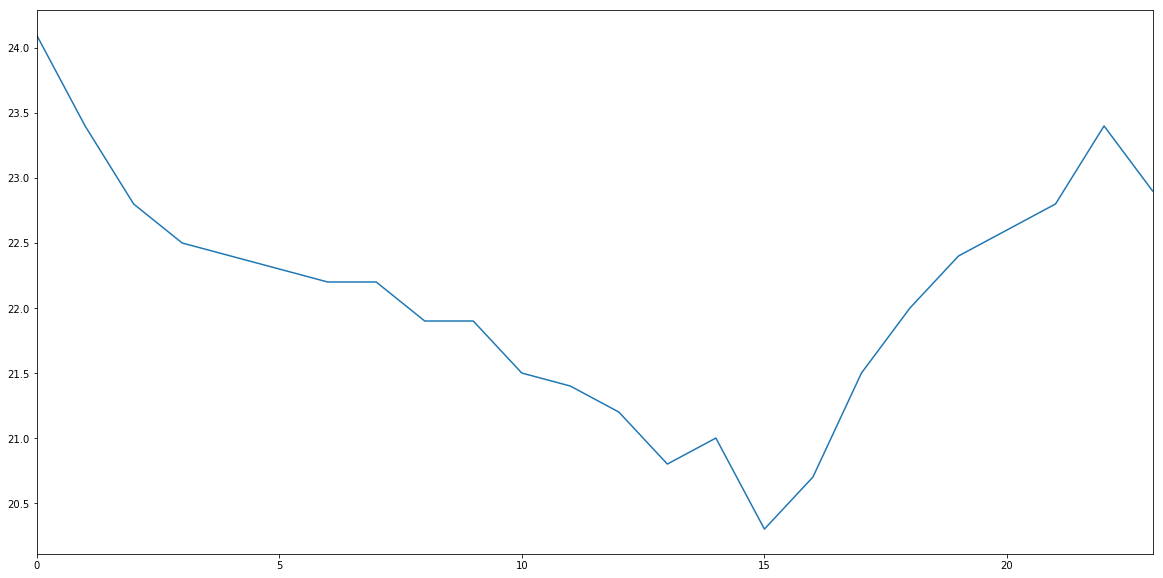

In [19]:
station_384_temp_sept_oct = station_384_temp.head(24)
station_384_temp_sept_oct.plot()

## Explore one year of data

Try a year of data from one station 

In [20]:
is_385 = df['wsid'] == 385
station_385 = df[is_385]
station_385_year = station_385.tail(8760)

Grab just the temperature data and see how it looks.

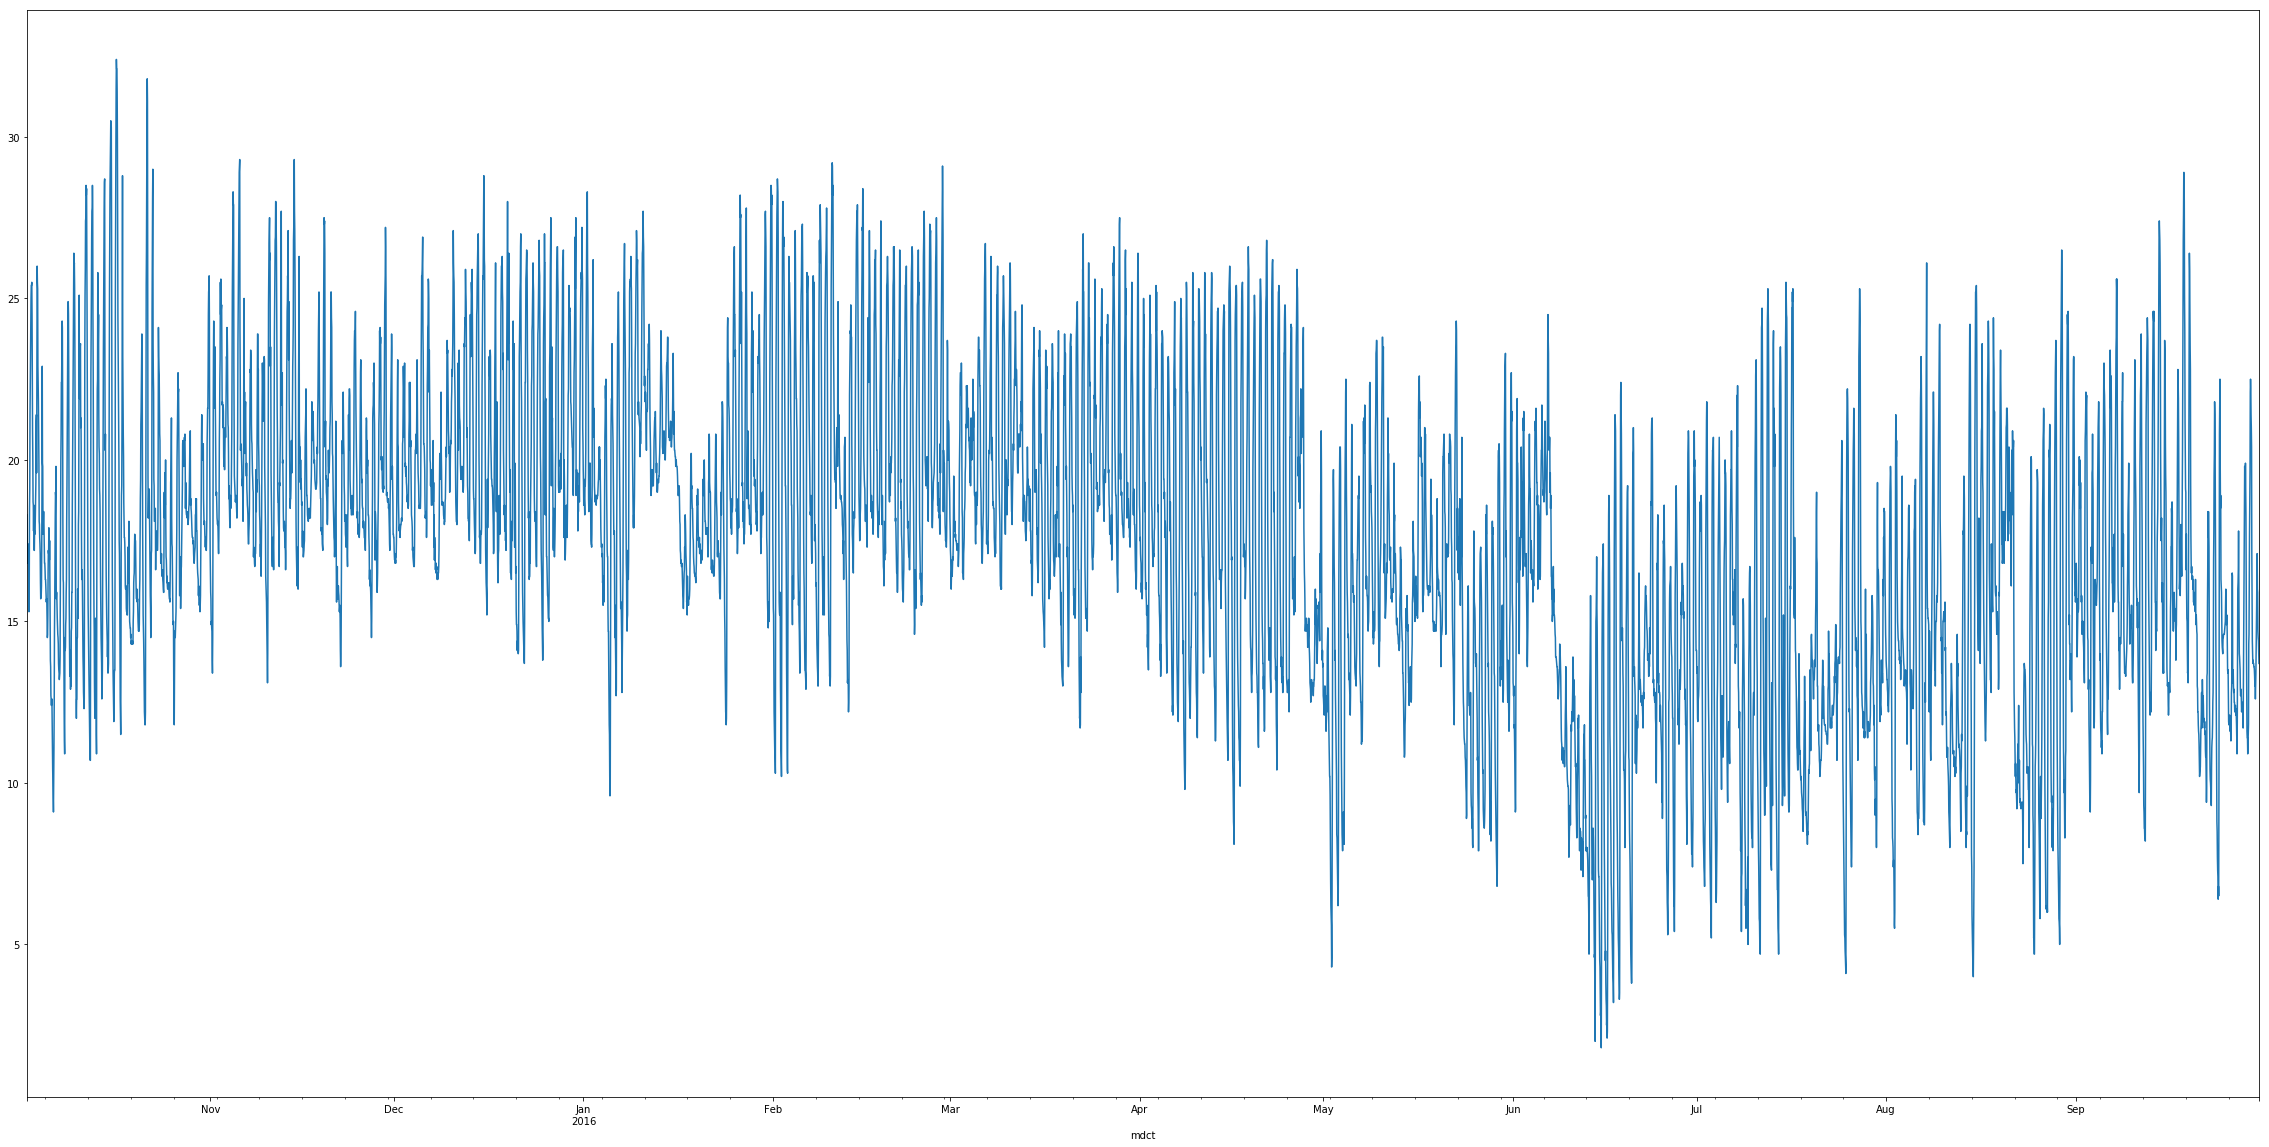

In [21]:
pd.options.mode.chained_assignment = None  # default='warn'
station_385_year_temp = station_385_year['temp']
station_385_year_temp.replace(0, np.nan, inplace=True)
station_385_year_temp.interpolate('linear', inplace=True, limit_direction='both')
plt.rcParams['figure.figsize'] = (40, 20)
station_385_year_temp.plot()

Look at a year's worth of gbrd (solar radiation) data. NaN values in gbrd (solar radiation) occur when the sun goes down. So we only get 8 to 12 data points each day.

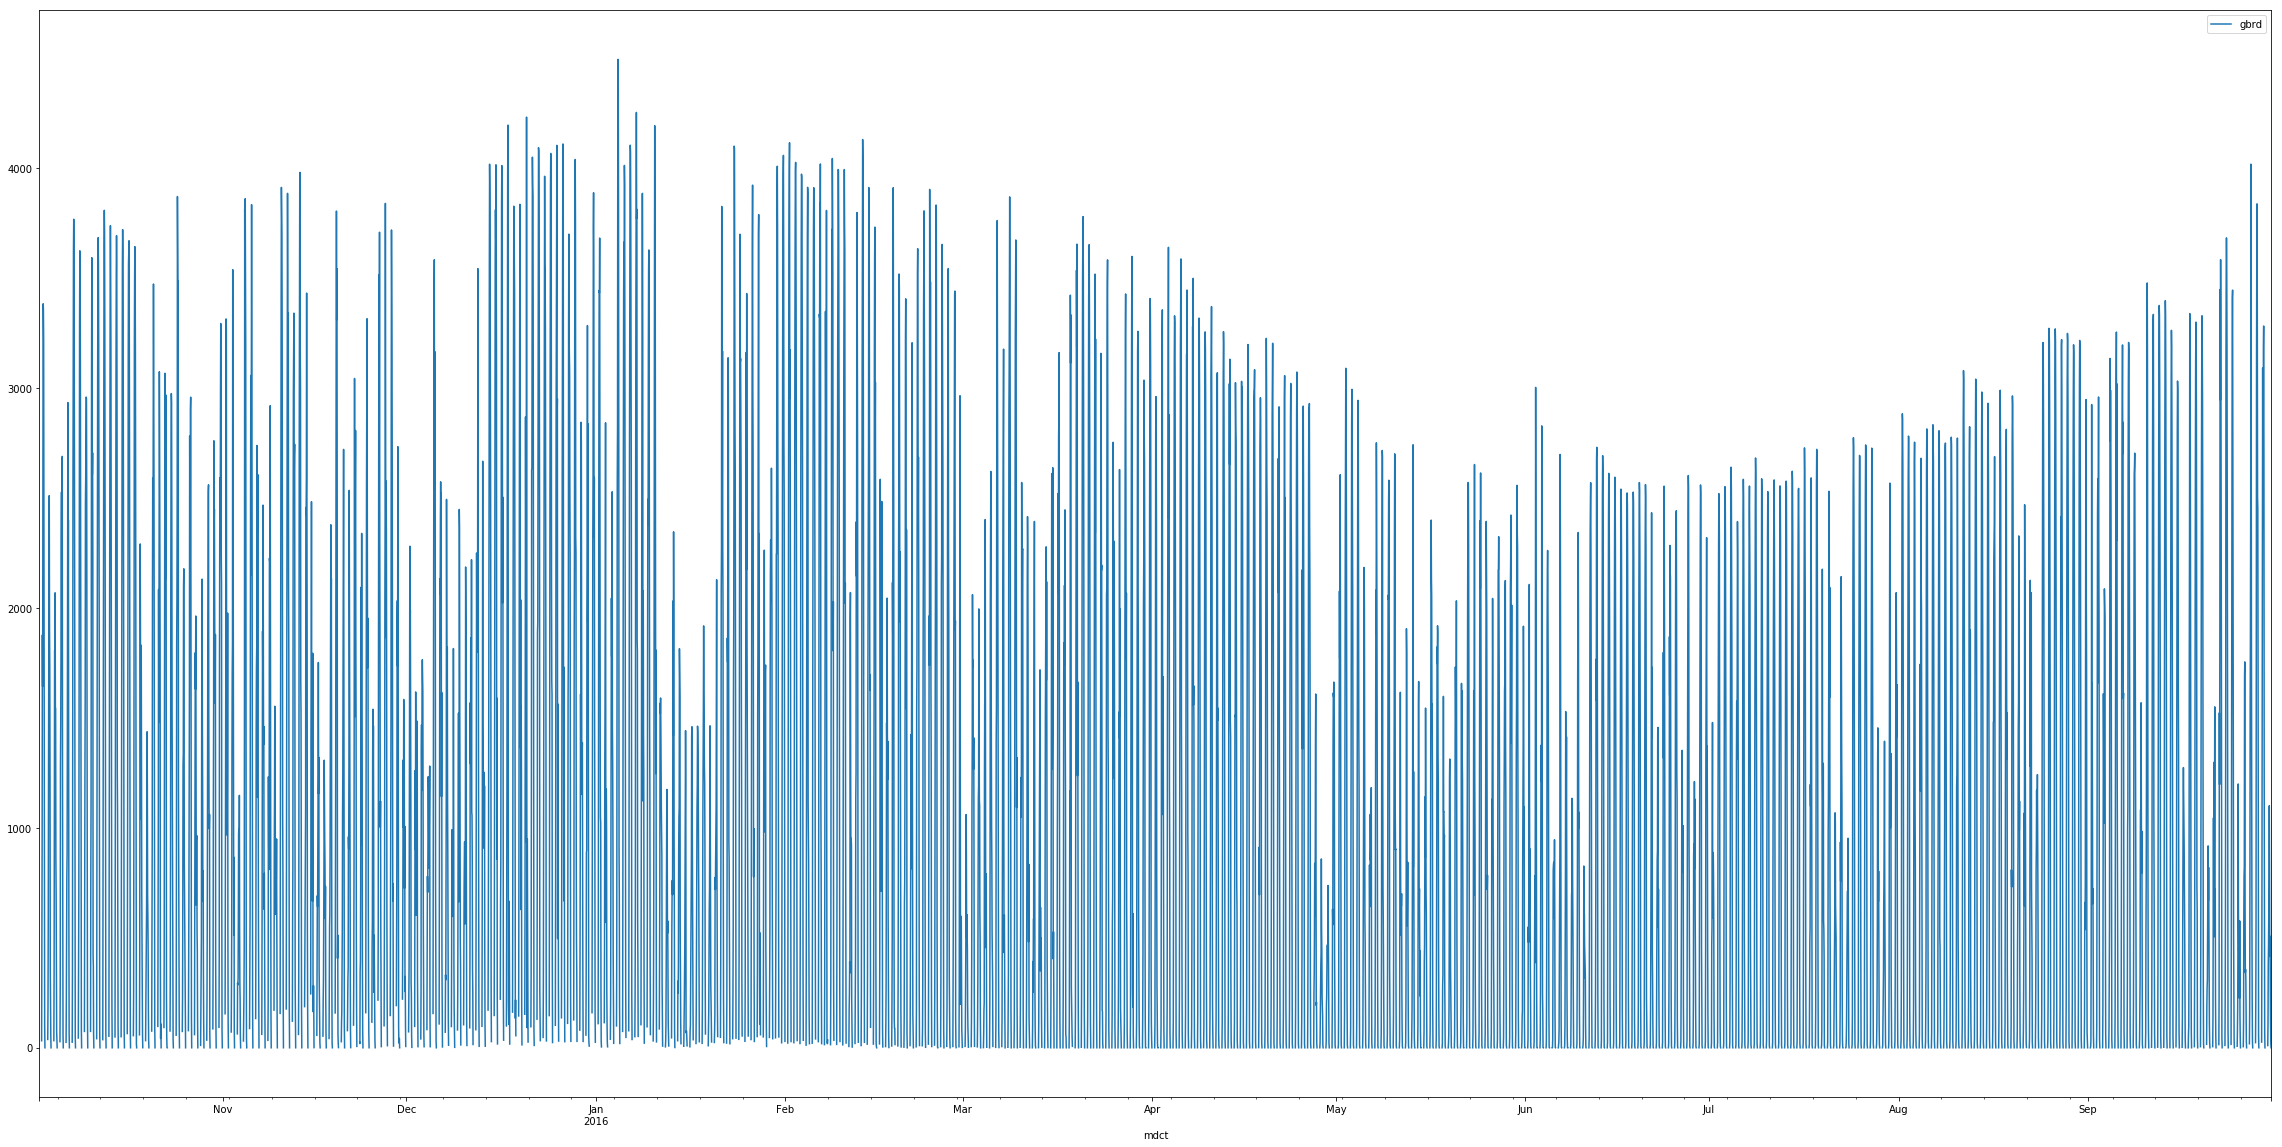

In [22]:
station_385_year[['gbrd']].plot()

Let's play with some rain data. From our observations on precipitation above, it looks like stations report NA values when it doesn't rain, so let's fill those NA's with zero. Then get total and average rain per month for station 385.

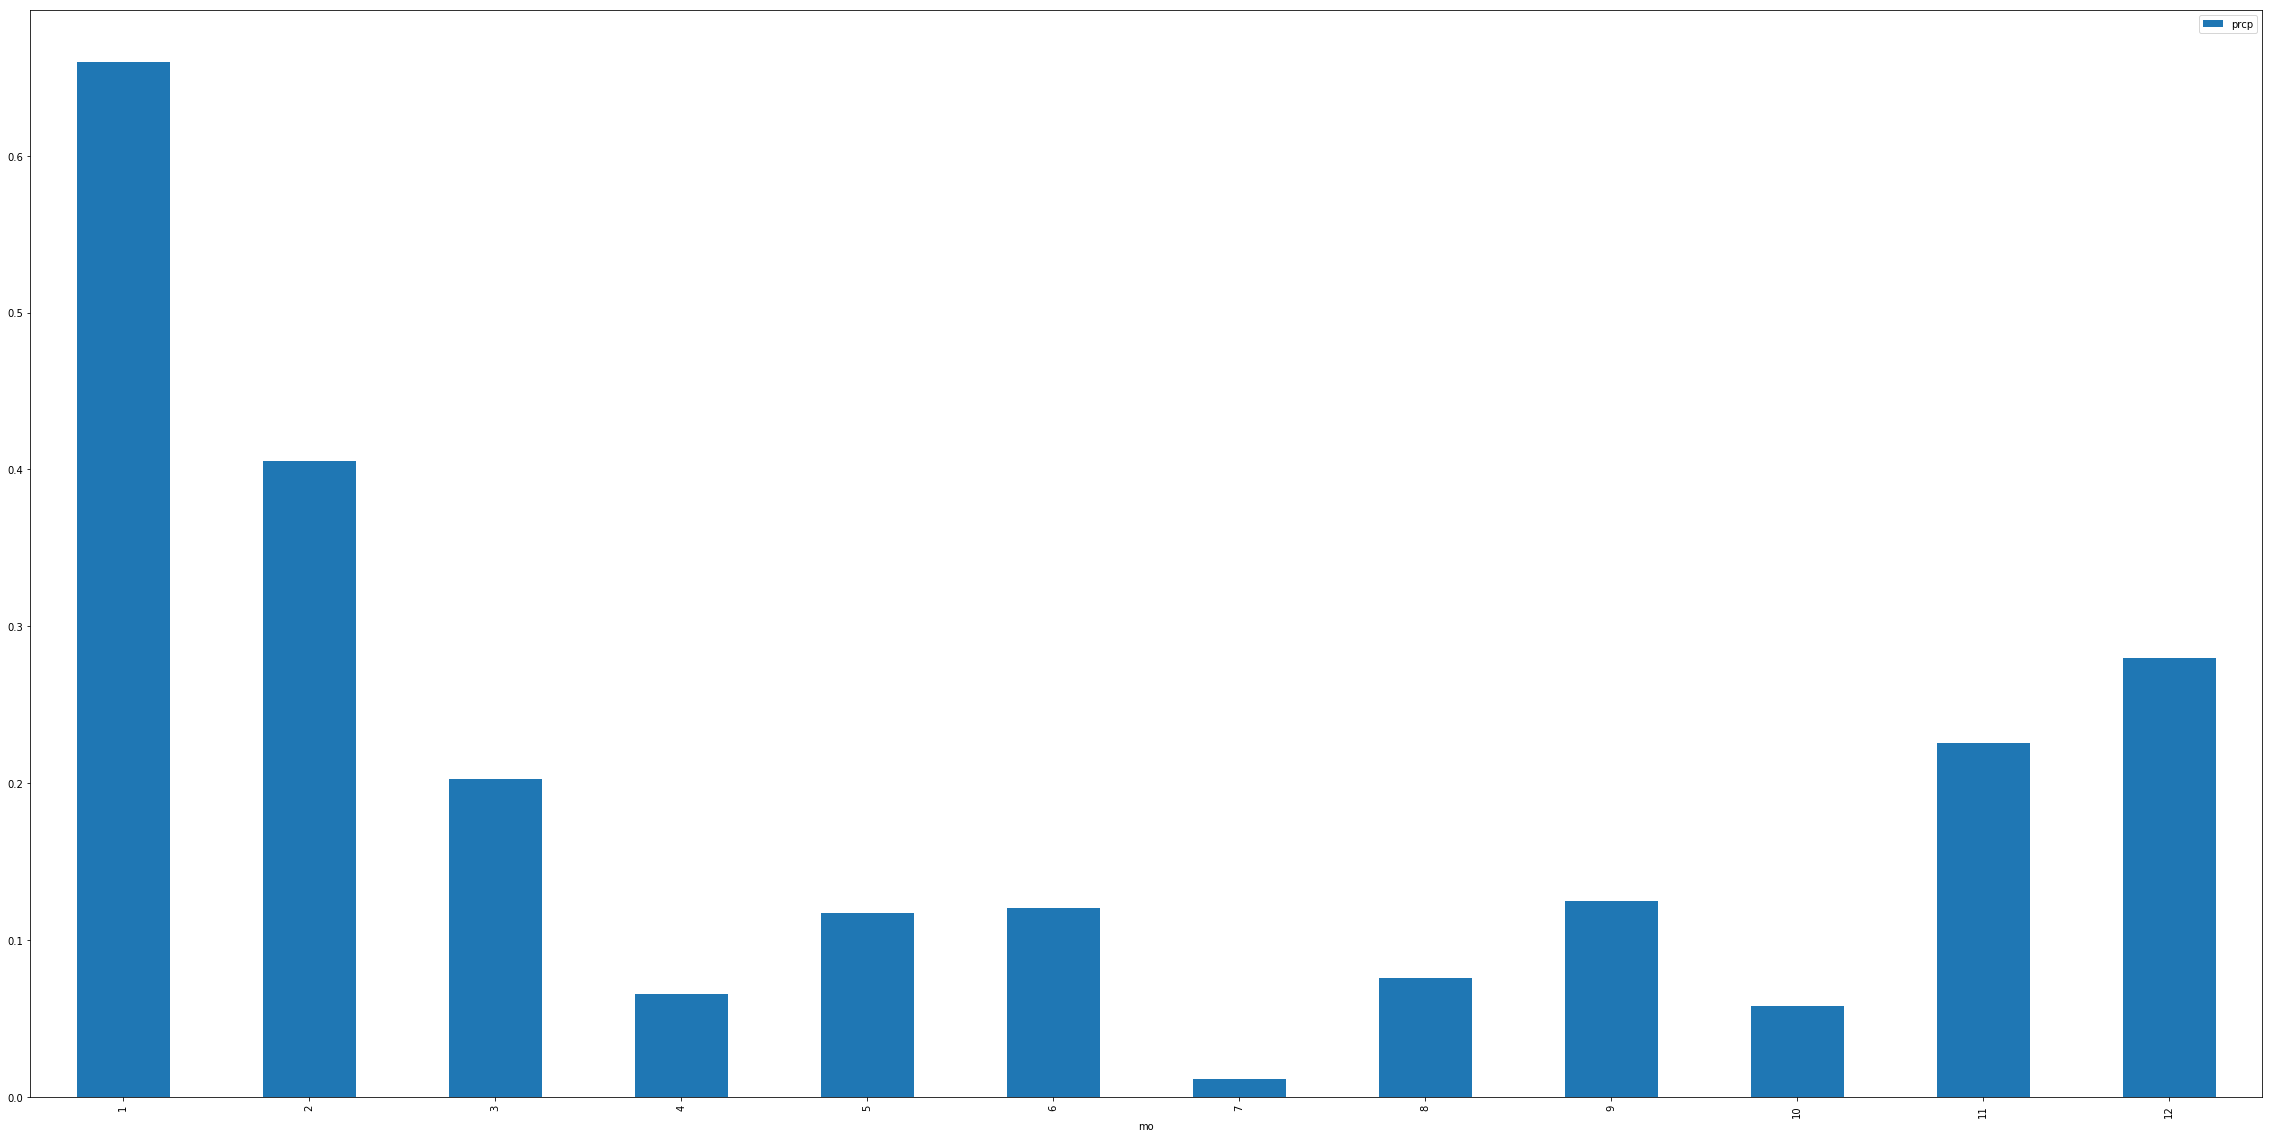

In [23]:
rain_df = station_385_year[['mo','prcp']].fillna(0)
total_rain = rain_df.groupby('mo').sum().reset_index()
average_rain = rain_df.groupby('mo').mean().reset_index()
average_rain.plot( x='mo', y='prcp', kind='bar')

Looks like the summer months (December, January, February) get the most rain. Remember, we are south of the equator, so their summer is our winter. 

Let's try the plots in seaborn, just to compare how they look against matplotlib. 

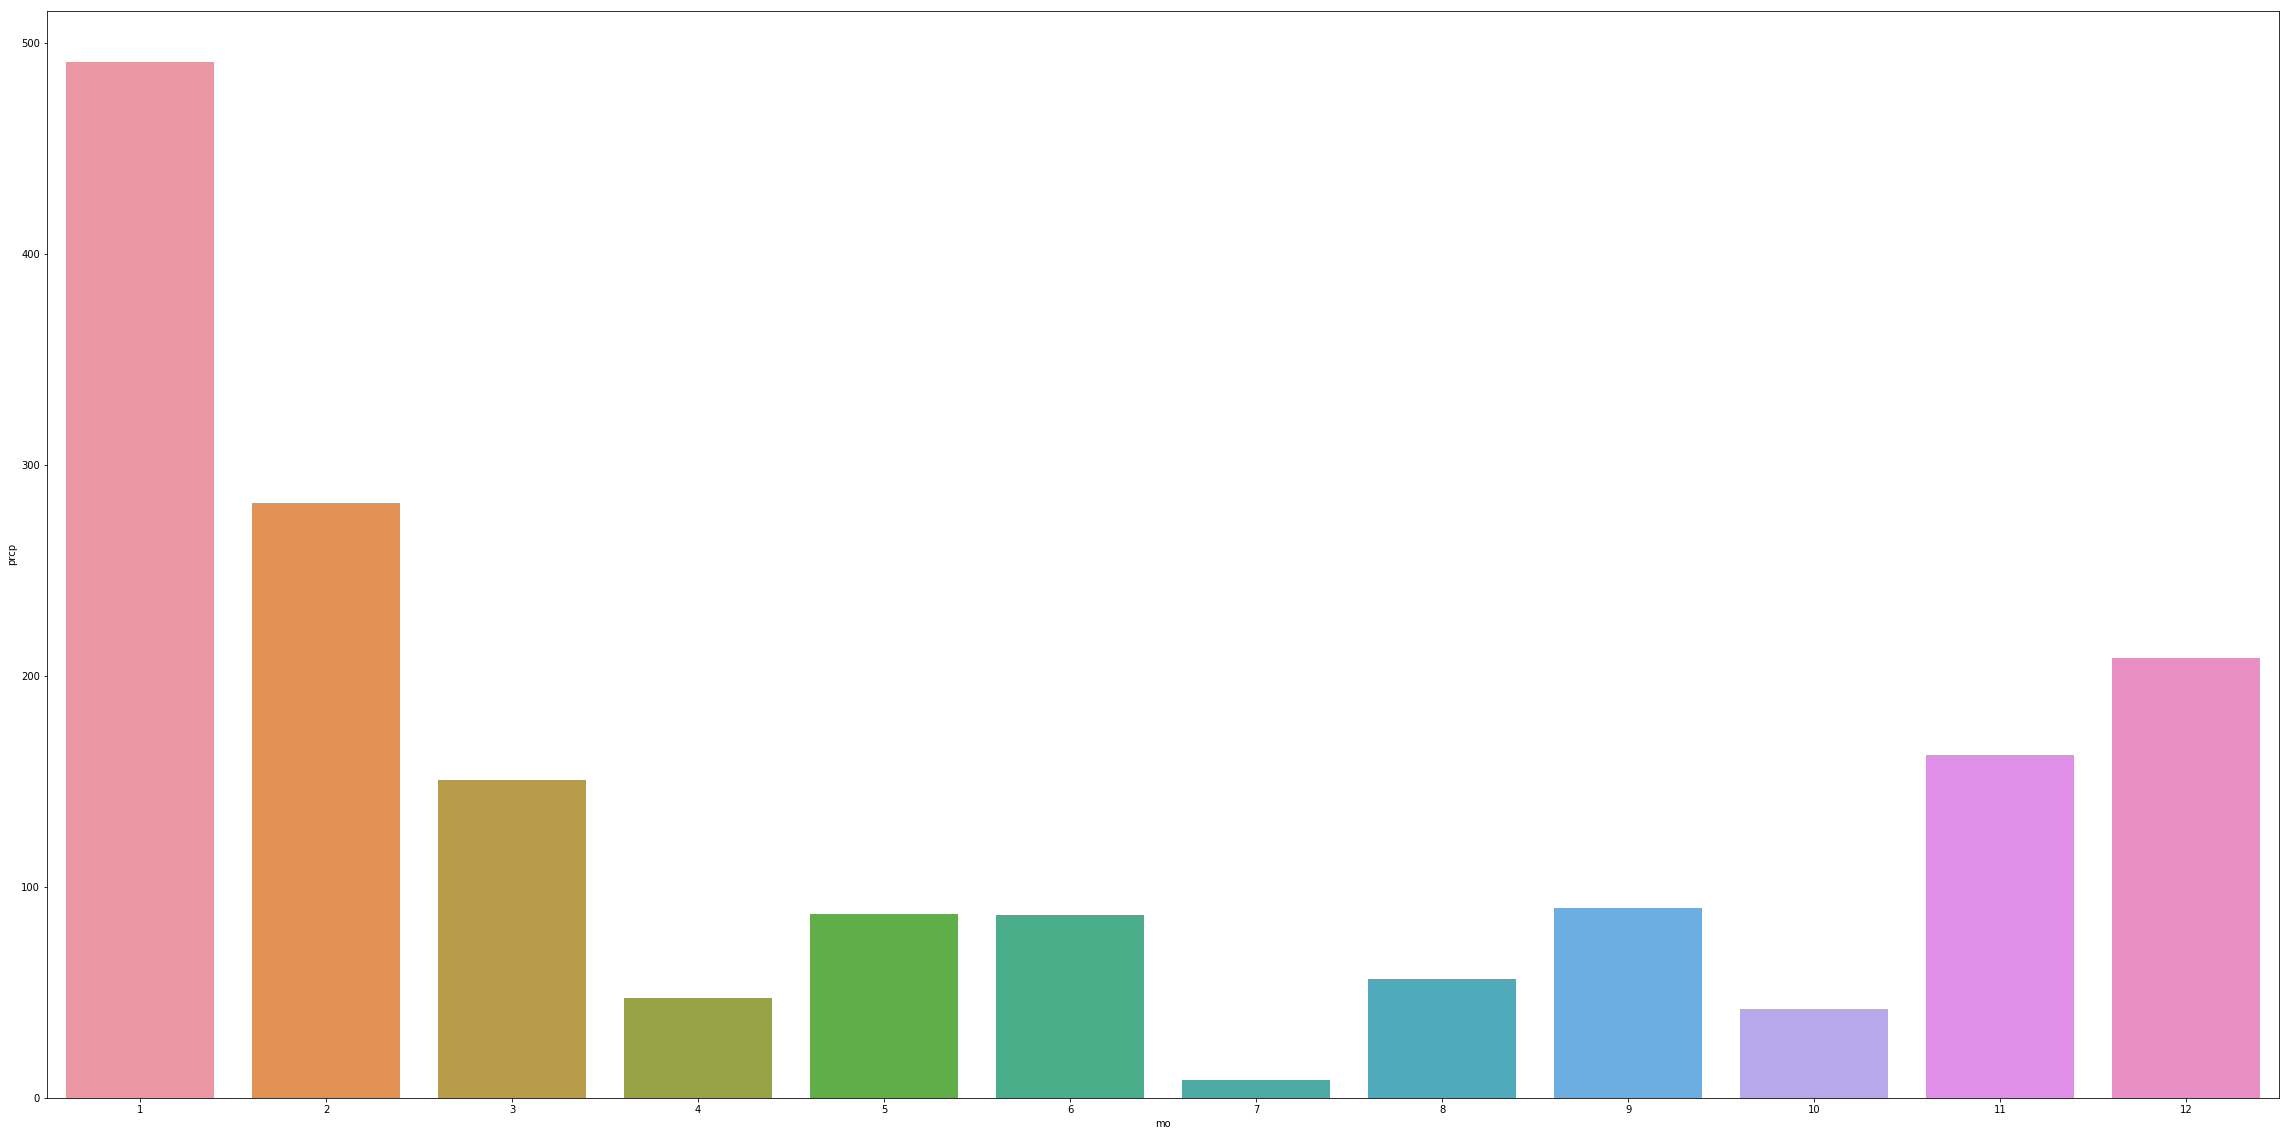

In [24]:
sns.barplot(x=total_rain.mo, y=total_rain.prcp)

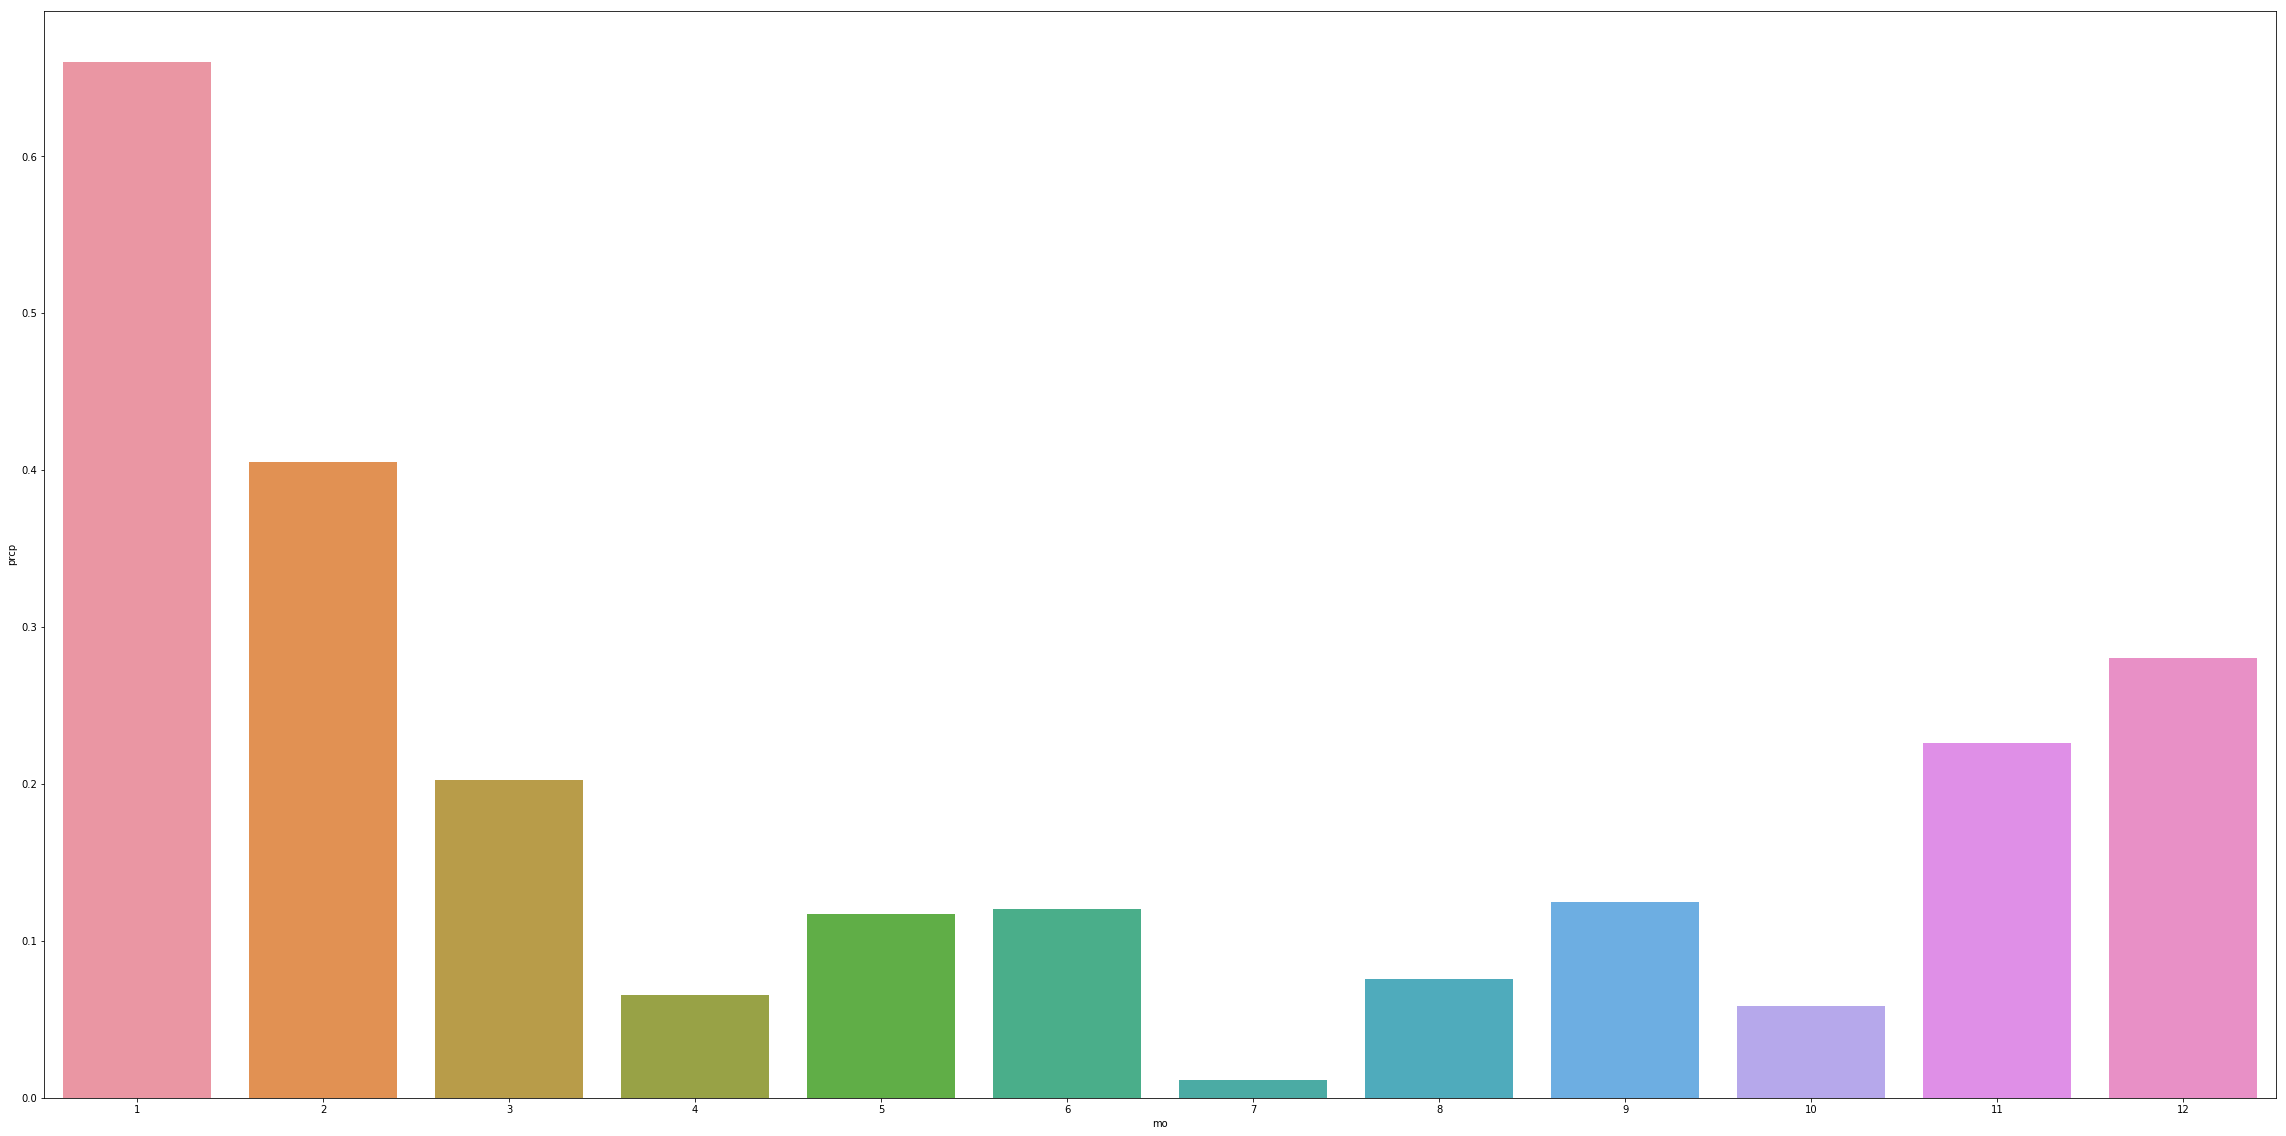

In [25]:
sns.barplot(x=average_rain.mo, y=average_rain.prcp)

### Clean-up on one station

Clean up for one weather station with it's own quarks. This station does not track all years, will need to drop all Null and 0 values for all columns for the beginning part.

- interpolate to clean up temp, tmax, tmin, dmax, dmin, hmax, hmin,
- fill NaNs for precipitation
- fill NaNs for solar radiation
- stp, smax, smin, dewp, hmdy, wdsp, wdct, and gust seem clean (call unique on the values and see if anything looks odd)

In [26]:
is_385 = df['wsid'] == 385
station_385 = df[is_385]

In [27]:
station_385.shape

(52944, 30)

In [28]:
station_385['temp'].replace(0, np.nan, inplace=True)
station_385['temp'].interpolate('linear', inplace=True, limit_direction='both')
station_385['prcp'].fillna(0,inplace=True)
station_385['gbrd'].fillna(0,inplace=True)
station_385['tmax'].replace(0, np.nan, inplace=True)
station_385['tmax'].interpolate('linear', inplace=True, limit_direction='both')
station_385['tmin'].replace(0, np.nan, inplace=True)
station_385['tmin'].interpolate('linear', inplace=True, limit_direction='both')
station_385['dmax'].replace(0, np.nan, inplace=True)
station_385['dmax'].interpolate('linear', inplace=True, limit_direction='both')
station_385['dewp'].replace(0, np.nan, inplace=True)
station_385['dewp'].interpolate('linear', inplace=True, limit_direction='both')
station_385['dmin'].replace(0, np.nan, inplace=True)
station_385['dmin'].interpolate('linear', inplace=True, limit_direction='both')
station_385['hmax'].replace(0, np.nan, inplace=True)
station_385['hmax'].interpolate('linear', inplace=True, limit_direction='both')
station_385['hmin'].replace(0, np.nan, inplace=True)
station_385['hmin'].interpolate('linear', inplace=True, limit_direction='both')

Good way to get unique values for each column to take a quick look if anything looks incorrect

In [29]:
d = {}
for col in station_385:
    d[col] = station_385[col].unique().tolist()
    
print(d['prcp'])

[0.0, 0.2, 1.0, 1.2, 0.6, 0.4, 0.8, 1.4, 4.2, 1.8, 2.6, 2.8, 1.6, 20.6, 8.2, 3.4, 3.6, 3.8, 2.4, 2.2, 3.2, 10.0, 10.4, 2.0, 16.6, 6.2, 13.6, 10.2, 11.2, 3.0, 7.4, 5.8, 23.2, 29.2, 18.6, 30.4, 11.8, 4.8, 15.6, 4.0, 5.0, 21.4, 5.6, 5.4, 8.0, 5.2, 4.6, 21.2, 7.2, 9.2, 20.2, 16.4, 8.6, 7.8, 6.0, 10.8, 12.0, 24.4, 4.4, 6.6, 11.0, 9.0, 22.6, 8.8, 6.8, 11.6, 12.2, 6.4, 9.6, 30.0, 62.8, 18.2, 9.8, 13.0, 15.8, 13.2, 14.8, 12.4, 22.2, 13.4, 11.4, 17.8, 14.2, 7.0, 15.4, 9.4, 15.2, 12.6, 7.6, 17.0, 13.8, 25.4, 8.4, 15.0, 17.2, 10.6, 23.6, 12.8, 19.8, 34.2, 32.2, 20.0, 23.8, 14.0, 16.2, 21.6, 25.0, 20.8, 19.2, 41.0, 21.8, 22.4, 23.4, 14.6, 16.8, 24.2, 27.2, 18.4, 19.6, 19.4, 14.4, 29.4, 52.6, 21.0]


After interpolating and filling NAs, let's see what we are left with

In [30]:
station_385.isna().sum()

wsid    0
wsnm    0
elvt    0
lat     0
lon     0
inme    0
city    0
prov    0
date    0
yr      0
mo      0
da      0
hr      0
prcp    0
stp     0
smax    0
smin    0
gbrd    0
temp    0
dewp    0
tmax    0
dmax    0
tmin    0
dmin    0
hmdy    0
hmax    0
hmin    0
wdsp    0
wdct    0
gust    0
dtype: int64

Analyzing the data, we see that the station was not in operation in the first couple of years, so let's drop those values. Drop where all sensor columns are 0.

In [31]:
col = ['prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust']
station_385 = station_385[(station_385[col] != 0).any(axis=1)]

Station 385 cleaned. Save to hdf file for later use

In [32]:
station_385.to_hdf('station_385.hdf','mydata',mode='w')

# Clean-up entire dataset

Let's attempt to clean up all stations. Best way is to look at all columns with NA values and with zero values and see if it makes sense.

In [33]:
df = pd.read_hdf('weather.hdf','mydata')
df = df.set_index('mdct')
df.index = pd.to_datetime(df.index)
df.isna().sum()

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64

In [34]:
(df == 0).astype(int).sum(axis=0)

wsid         0
wsnm         0
elvt     71760
lat      71760
lon      71760
inme         0
city         0
prov         0
date         0
yr           0
mo           0
da           0
hr      407466
prcp    746679
stp     701723
smax    705438
smin    705358
gbrd    879490
temp    628611
dewp    705849
tmax    631473
dmax    706613
tmin    631410
dmin    714946
hmdy    679673
hmax    677458
hmin    684793
wdsp    828184
wdct    870382
gust    841180
dtype: int64

Some stations do not have wind or rain sensors, owing to why there are so many Null values. Will set them to zero to be able to do cleanup. Gbrd has null values for when the sun is down (little less than half the time which makes sense). Make these zero values also to not affect analysis. Other column null values we can set to zero and interpolate to get a value.

In [35]:
df['prcp'].fillna(0,inplace=True)
df['gbrd'].fillna(0,inplace=True)

Drop where all sensor columns are 0

In [36]:
col = ['prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust']
df = df[(df[col] != 0).any(axis=1)]

In [37]:
df.shape

(9159199, 30)

9779168 - 9159199 = 619969 columns dropped

Interpolate for everything else

In [39]:
df['temp'].replace(0, np.nan, inplace=True)
df['temp'].interpolate('linear', inplace=True, limit_direction='both')
df['dewp'].replace(0, np.nan, inplace=True)
df['dewp'].interpolate('linear', inplace=True, limit_direction='both')
df['tmax'].replace(0, np.nan, inplace=True)
df['tmax'].interpolate('linear', inplace=True, limit_direction='both')
df['tmin'].replace(0, np.nan, inplace=True)
df['tmin'].interpolate('linear', inplace=True, limit_direction='both')
df['dmax'].replace(0, np.nan, inplace=True)
df['dmax'].interpolate('linear', inplace=True, limit_direction='both')
df['dmin'].replace(0, np.nan, inplace=True)
df['dmin'].interpolate('linear', inplace=True, limit_direction='both')
df['hmax'].replace(0, np.nan, inplace=True)
df['hmax'].interpolate('linear', inplace=True, limit_direction='both')
df['hmin'].replace(0, np.nan, inplace=True)
df['hmin'].interpolate('linear', inplace=True, limit_direction='both')
df['hmdy'].replace(0, np.nan, inplace=True)
df['hmdy'].interpolate('linear', inplace=True, limit_direction='both')
df['wdsp'].interpolate('linear', inplace=True,limit_direction='both')
df['gust'].interpolate('linear', inplace=True,limit_direction='both')

Look at NAs and zeros

In [40]:
df.isna().sum()

wsid    0
wsnm    0
elvt    0
lat     0
lon     0
inme    0
city    0
prov    0
date    0
yr      0
mo      0
da      0
hr      0
prcp    0
stp     0
smax    0
smin    0
gbrd    0
temp    0
dewp    0
tmax    0
dmax    0
tmin    0
dmin    0
hmdy    0
hmax    0
hmin    0
wdsp    0
wdct    0
gust    0
dtype: int64

In [41]:
(df == 0).astype(int).sum(axis=0)

wsid          0
wsnm          0
elvt      39710
lat       39710
lon       39710
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr       380996
prcp    8497894
stp       81754
smax      85469
smin      85389
gbrd    4368341
temp          2
dewp         23
tmax          3
dmax         15
tmin          4
dmin         24
hmdy          0
hmax          0
hmin          0
wdsp     210341
wdct     250413
gust     222488
dtype: int64

Let's look into why elevation, lat, lon is zero (all same weather station?). Same with smin, smax etc, and look at surrounding values to see if it makes sense.

 - hr, prcp, and gbrd are ok to be 0

In [42]:
df[df.elvt == 0].index[0]

Timestamp('2008-07-25 18:00:00')

In [43]:
df[df.elvt == 0].head()

wsid   wsnm  elvt  lat  lon  inme     city prov  \
mdct                                                                   
2008-07-25 18:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   
2008-07-25 19:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   
2008-07-25 20:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   
2008-07-25 21:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   
2008-07-25 22:00:00   418  MOELA   0.0  0.0  0.0  ZZZ3  Guarujá   SP   

                           date    yr  mo  da  hr  prcp     stp    smax  \
mdct                                                                      
2008-07-25 18:00:00  2008-07-25  2008   7  25  18   0.0  1014.3  1014.3   
2008-07-25 19:00:00  2008-07-25  2008   7  25  19   0.0  1014.8  1014.8   
2008-07-25 20:00:00  2008-07-25  2008   7  25  20   0.0  1015.2  1015.2   
2008-07-25 21:00:00  2008-07-25  2008   7  25  21   0.0  1015.8  1015.8   
2008-07-25 22:00:00  2008-07-25  2008   7  25  22   0.0  1016.7  1016.7   

                       smin     gbrd  temp  dewp  tmax  dmax  tmin  dmin  \
mdct                                                                       
2008-07-25 18:00:00  1014.0  426.700  20.0  16.0  20.2  16.9  19.8  15.8   
2008-07-25 19:00:00  1014.2  167.094  19.9  15.3  20.0  16.3  19.8  15.3   
2008-07-25 20:00:00  1014.8   95.589  19.6  15.4  19.9  15.7  19.5  15.2   
2008-07-25 21:00:00  1015.2   12.199  19.3  15.4  19.6  15.9  19.2  15.2   
2008-07-25 22:00:00  1015.8    0.000  19.2  14.0  19.3  15.5  19.2  13.7   

                     hmdy  hmax  hmin  wdsp   wdct  gust  
mdct                                                      
2008-07-25 18:00:00  78.0  83.0  76.0   3.3  242.0   7.2  
2008-07-25 19:00:00  75.0  80.0  75.0   2.5  239.0   7.4  
2008-07-25 20:00:00  77.0  78.0  74.0   2.8  222.0   6.8  
2008-07-25 21:00:00  78.0  80.0  77.0   1.9  276.0   8.0  
2008-07-25 22:00:00  72.0  79.0  70.0   4.0   94.0   8.4

In [69]:
df[["wsid", "city", "prov", "elvt", "lat", "lon"]].drop_duplicates()

wsid                      city prov    elvt        lat  \
mdct                                                                          
2007-11-06 00:00:00   178               São Gonçalo   RJ   237.0 -22.826944   
2006-10-31 16:00:00   303                   Vitória   ES     9.0 -20.271094   
2007-08-09 10:00:00   304              Santa Teresa   ES   976.0 -19.988388   
2006-10-27 00:00:00   305                  Linhares   ES    38.0 -19.356923   
2006-11-03 00:00:00   306            Alfredo Chaves   ES    14.0 -20.636526   
2006-10-25 15:00:00   307                São Mateus   ES    29.0 -18.676198   
2006-10-25 19:00:00   308                    Alegre   ES   129.0 -20.750412   
2008-06-25 12:00:00   309        Presidente Kennedy   ES    69.0 -21.100805   
2008-06-23 12:00:00   310              Nova Venécia   ES   156.0 -18.695265   
2011-09-28 18:00:00   311            Afonso Cláudio   ES   507.0 -20.104194   
2003-03-21 00:00:00   312                 Barbacena   MG  1169.0 -21.228373   
2002-12-19 12:00:00   313                     Araxá   MG  1018.0 -19.605696   
2002-12-19 00:00:00   314             Montes Claros   MG   646.0 -16.686316   
2003-03-21 00:00:00   315                Uberlândia   MG   875.0 -18.917072   
2002-12-15 00:00:00   316                  Almenara   MG   189.0 -16.166773   
2004-12-19 14:00:00   317               Camanducaia   MG  1545.0 -22.861604   
2005-09-15 21:00:00   318                    Viçosa   MG   698.0 -20.762607   
2006-02-24 22:00:00   319                   Timóteo   MG   493.0 -19.573824   
2006-05-12 09:00:00   320                 Ituiutaba   MG   540.0 -18.952907   
2006-07-28 16:00:00   321               Ouro Branco   MG  1048.0 -20.556592   
2006-06-09 20:00:00   322          São João del Rei   MG   930.0 -21.106502   
2006-07-13 05:00:00   323                  Varginha   MG   950.0 -21.566513   
2006-07-18 00:00:00   324                    Passos   MG   782.0 -20.745237   
2006-08-30 13:00:00   325                    Muriaé   MG   283.0 -21.104867   
2007-05-26 15:00:00   326              Juiz de Fora   MG   937.0 -21.769965   
2006-07-15 00:00:00   327             Campina Verde   MG   559.0 -19.539210   
2006-07-18 17:00:00   328     Conceição das Alagoas   MG   573.0 -19.985860   
2006-10-10 13:00:00   329            Belo Horizonte   MG   854.0 -19.883945   
2006-08-21 16:00:00   330         Serra dos Aimorés   MG   212.0 -17.798799   
2006-08-22 18:00:00   331                Patrocínio   MG   978.0 -18.996684   
2006-08-17 13:00:00   332                   Formiga   MG   878.0 -20.454930   
2006-08-19 00:00:00   333                Sacramento   MG   913.0 -19.875271   
2007-06-26 16:00:00   334               Montalvânia   MG   520.0 -14.408228   
2006-08-25 14:00:00   335             Teófilo Otoni   MG   467.0 -17.892840   
2006-08-26 00:00:00   336               Três Marias   MG   931.0 -18.200855   
2007-06-04 20:00:00   337              Passa Quatro   MG  1017.0 -22.395799   
2006-11-28 12:00:00   338                    Caldas   MG  1077.0 -21.918066   
2006-12-02 00:00:00   339               Maria da Fé   MG  1281.0 -22.314567   
2007-05-29 14:00:00   340      Governador Valadares   MG   198.0 -18.830354   
2007-06-02 15:00:00   341                  Guanhães   MG   853.0 -18.786842   
2007-08-06 00:00:00   342                   Aimorés   MG   288.0 -19.532768   
2008-06-27 12:00:00   343                 Florestal   MG   754.0 -19.885398   
2007-06-01 18:00:00   344           Dores do Indaiá   MG   721.0 -19.481935   
2007-06-05 00:00:00   345                Diamantina   MG  1359.0 -18.231052   
2006-12-18 21:00:00   346                   Curvelo   MG   669.0 -18.747711   
2007-11-11 00:00:00   347               Porteirinha   MG   454.0 -15.085958   
2007-08-01 12:00:00   348                   Mantena   MG   255.0 -18.780620   
2007-09-01 00:00:00   349                 Capelinha   MG   932.0 -17.705504   
2007-06-16 13:00:00   350                      Unaí   MG   641.0 -16.55

In [68]:
df[df.elvt == 0].wsid.unique()

array([], dtype=int64)

This explains the 0 values. Maybe the metadata for the station did not get input correctly? Let's go to the internet and see what the average lat/lon and elevation is for Guarujá

https://en.wikipedia.org/wiki/Guaruj%C3%A1

It is a very small area (55 sq miles) Elevation is 4 meters lat lon is 23°59′37″S 46°15′23″W --> lat -23.993611, lon -46.256389 We can change this in our dataset to get a more accurate description

In [44]:
df['elvt'].replace(0, 4, inplace=True)
df['lat'].replace(0, -23.993611, inplace=True)
df['lon'].replace(0, -46.256389, inplace=True)

Let's look at stp. It looks like a bunch of the stations just use the same Smax value as they do for stp..

In [45]:
stp_smax_equal = df[df['stp'] == df['smax']].count().stp
stp_smax_equal

3652525

3652525/9159199 = 0.398, so about 40% of the data has this issue... Does this warrant dropping one of the columns? Or is smax a good enough estimate for both? 

In [46]:
stp_smin_equal = df[df['stp'] == df['smin']].count().stp
stp_smin_equal

3458158

Uhoh, then the other 40% has stp = smin. What about when smax = smin?

In [47]:
smax_smin_equal = df[df['smax'] == df['smin']].count().stp
smax_smin_equal

92853

9159199 - (3652525 + 3458158 + 92853) = 1955663 rows have independent values for all 3.

Talked to some weather folks and it seems that this is perfectly reasonable for air pressure, min, max to hover around the same values in an hour span. So it actually looks like this is correct. We will keep it as is, and interpolate where there are 0 values since 0 air pressure doesn't make sense.

In [48]:
df['stp'].replace(0, np.nan, inplace=True)
df['stp'].interpolate('linear', inplace=True, limit_direction='both')
df['smax'].replace(0, np.nan, inplace=True)
df['smax'].interpolate('linear', inplace=True, limit_direction='both')
df['smin'].replace(0, np.nan, inplace=True)
df['smin'].interpolate('linear', inplace=True, limit_direction='both')

#### Air pressure and wind analysis

Let's look at a 2 week sample for station 384

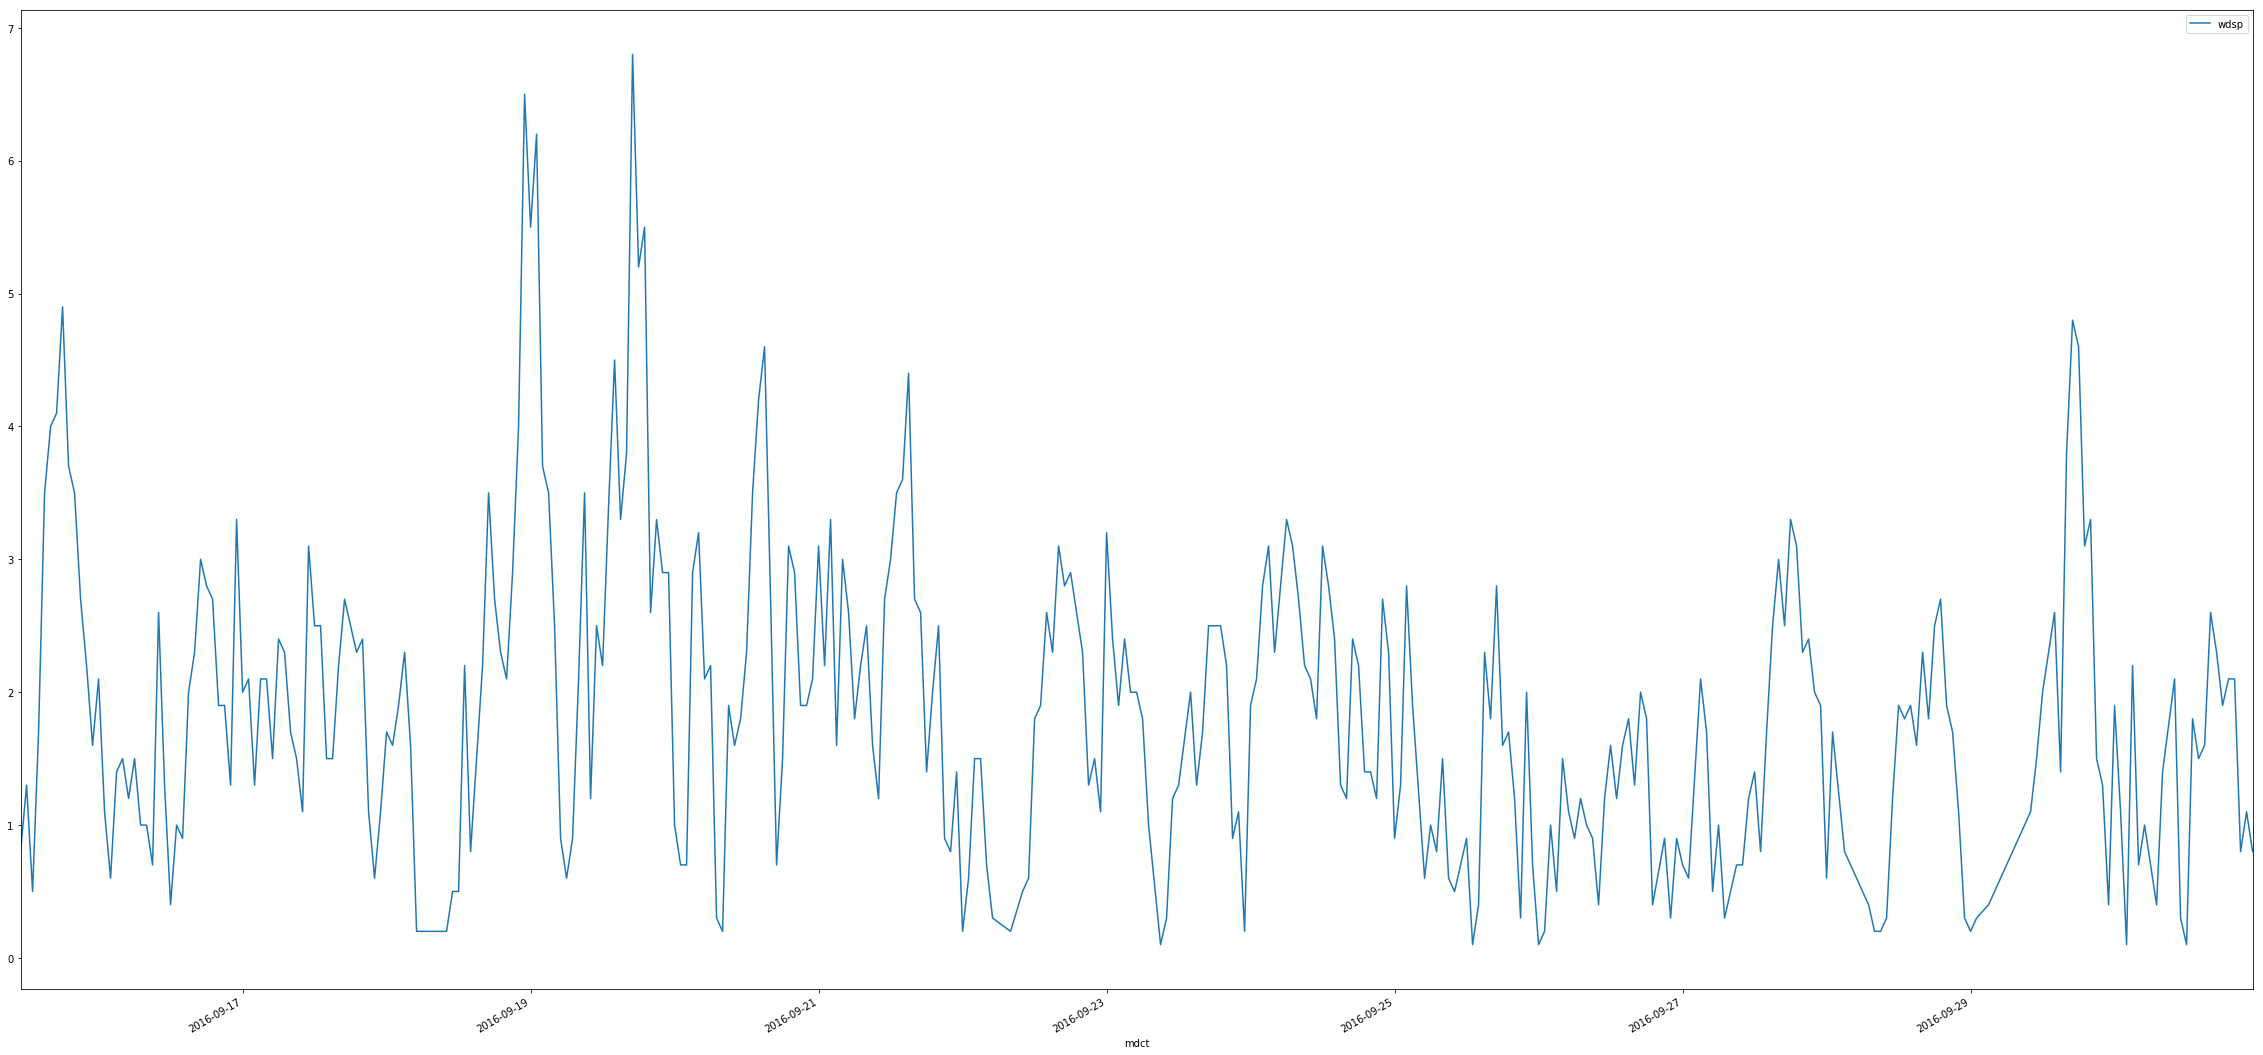

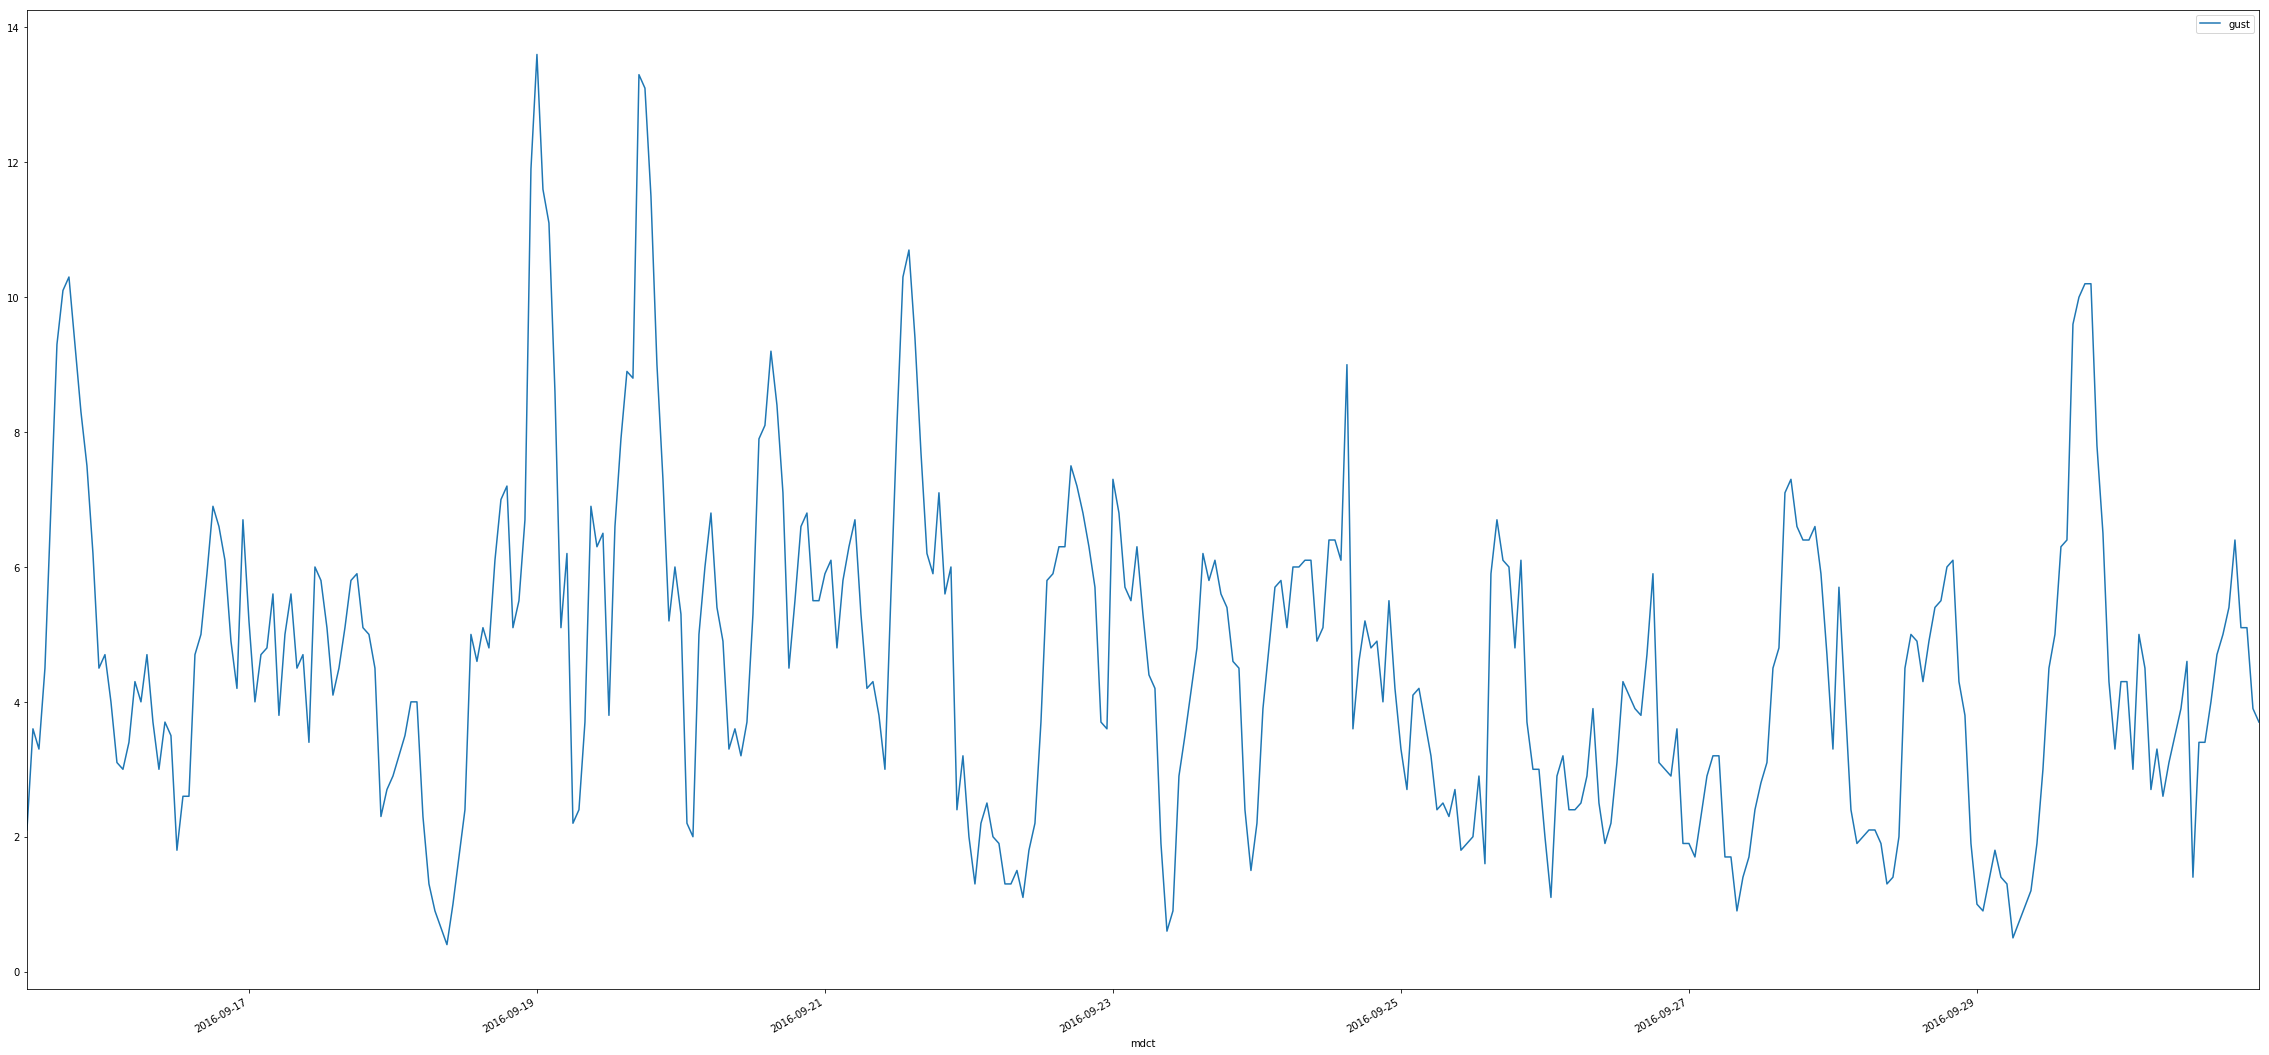

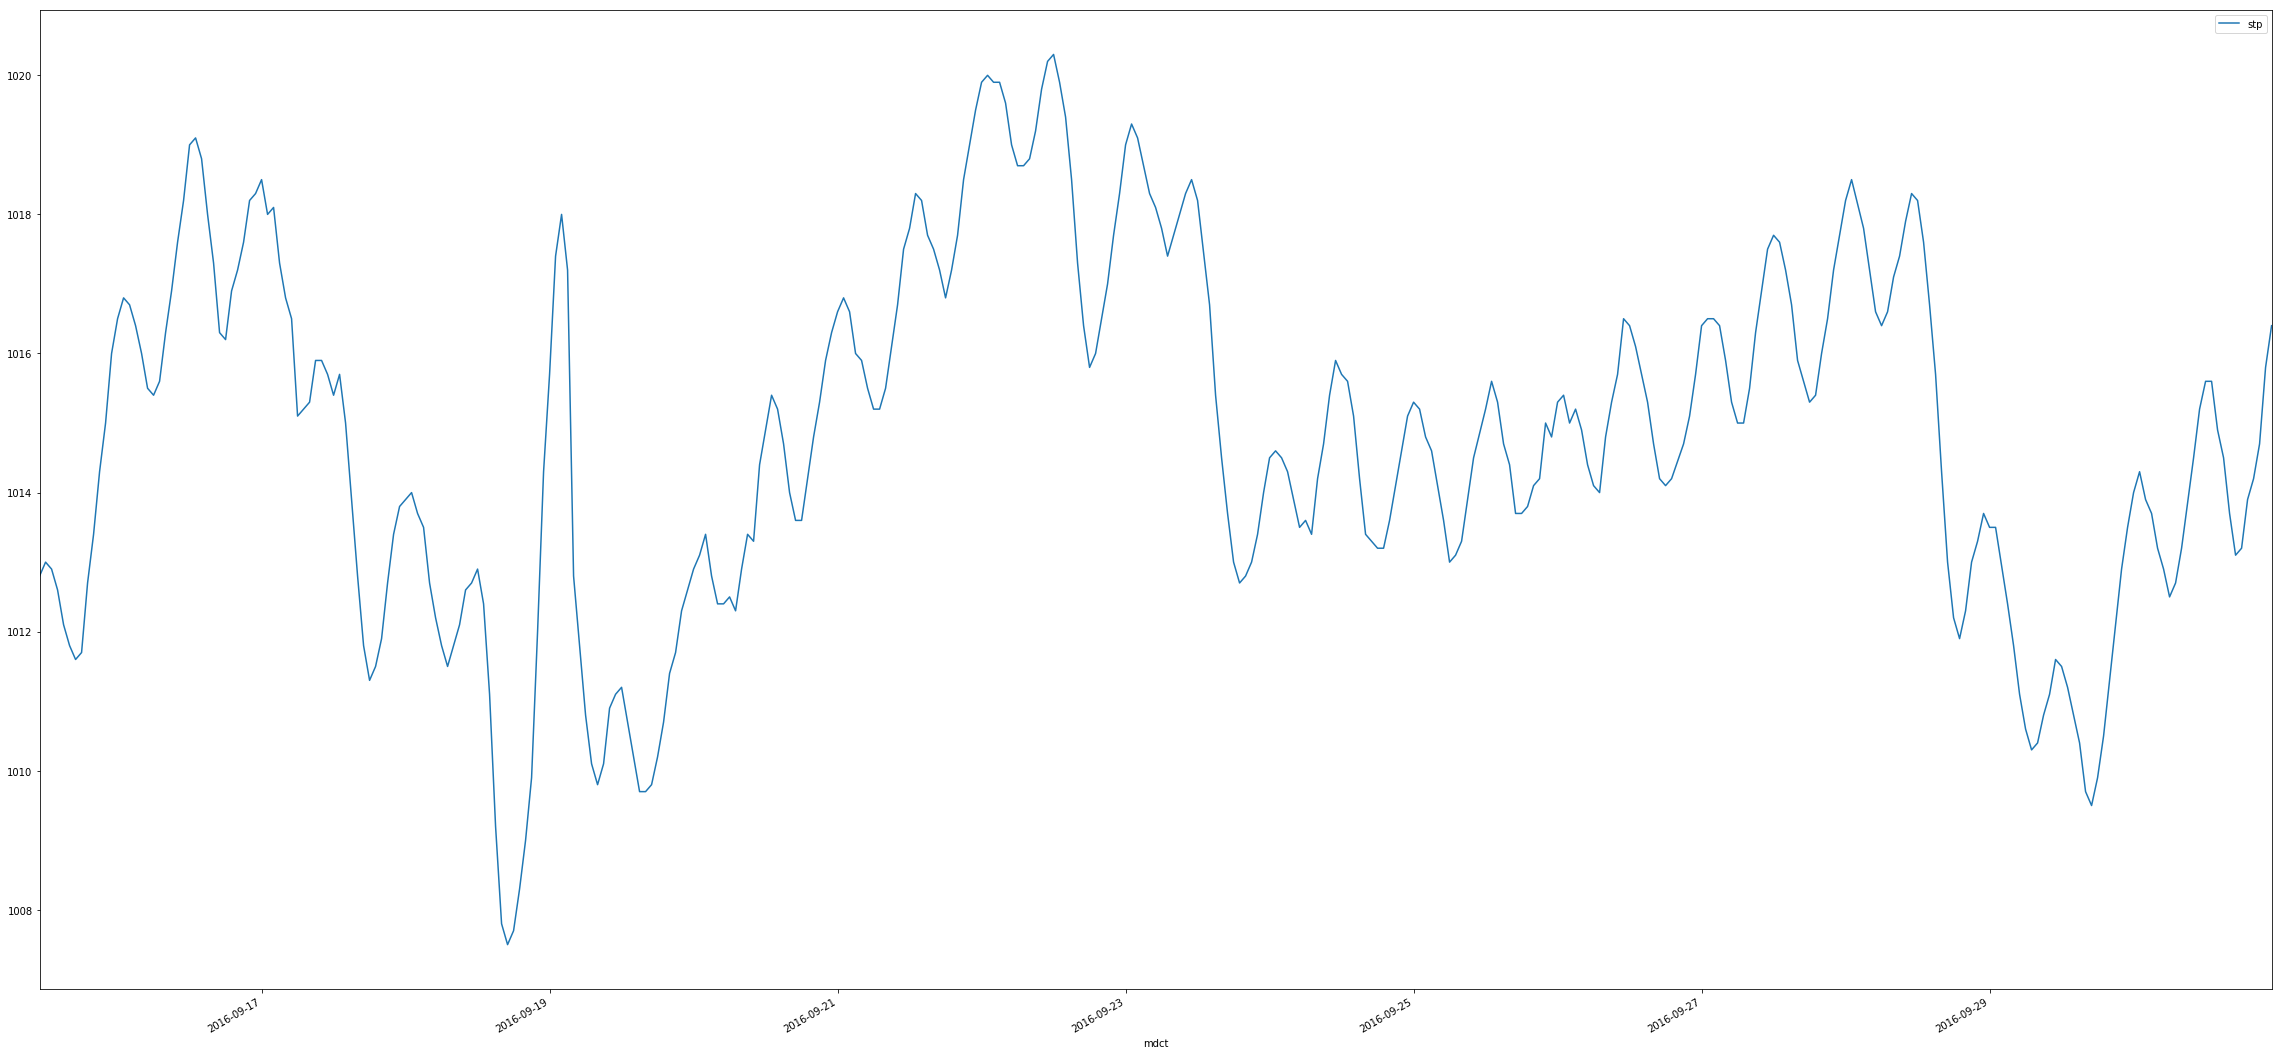

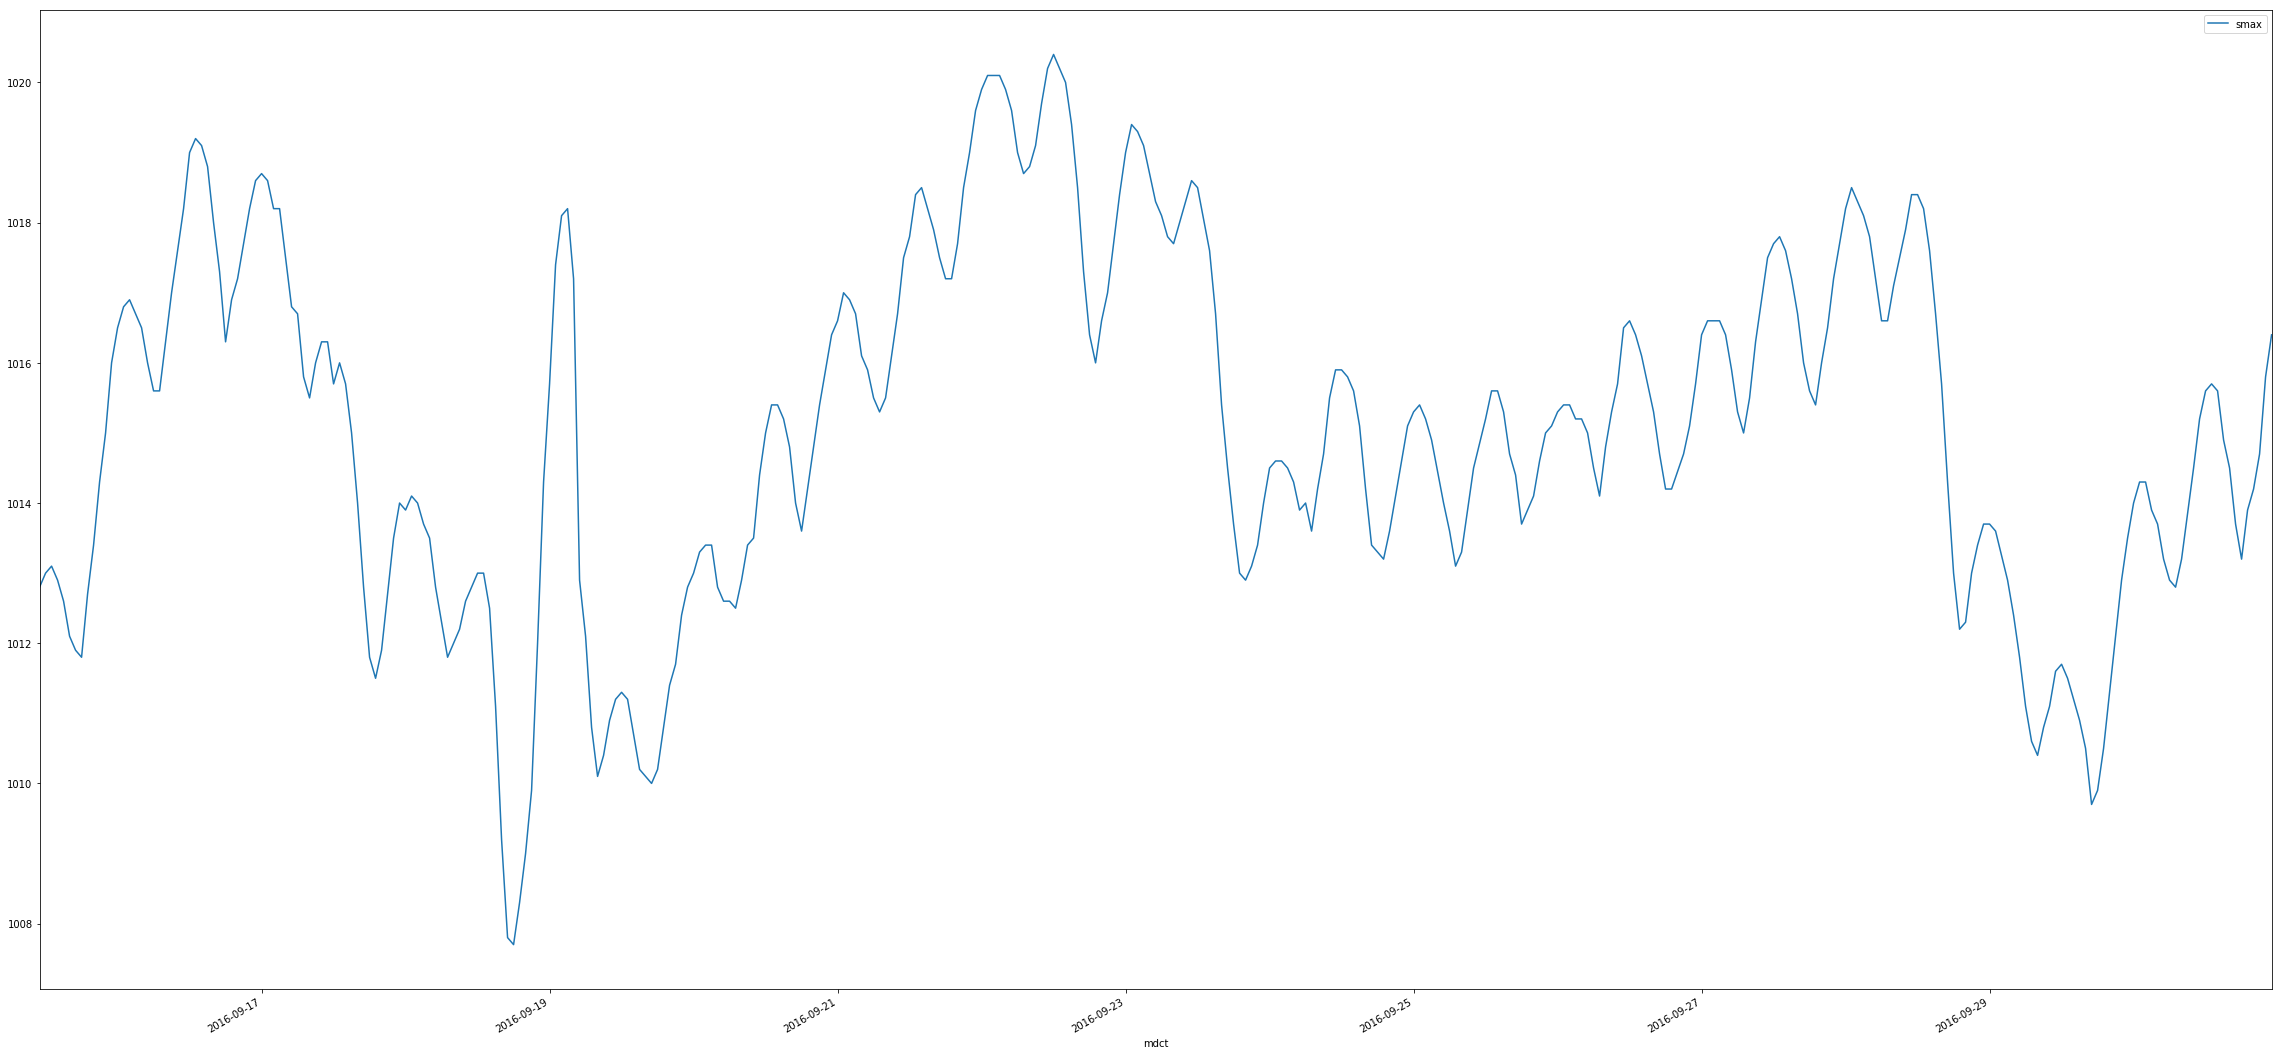

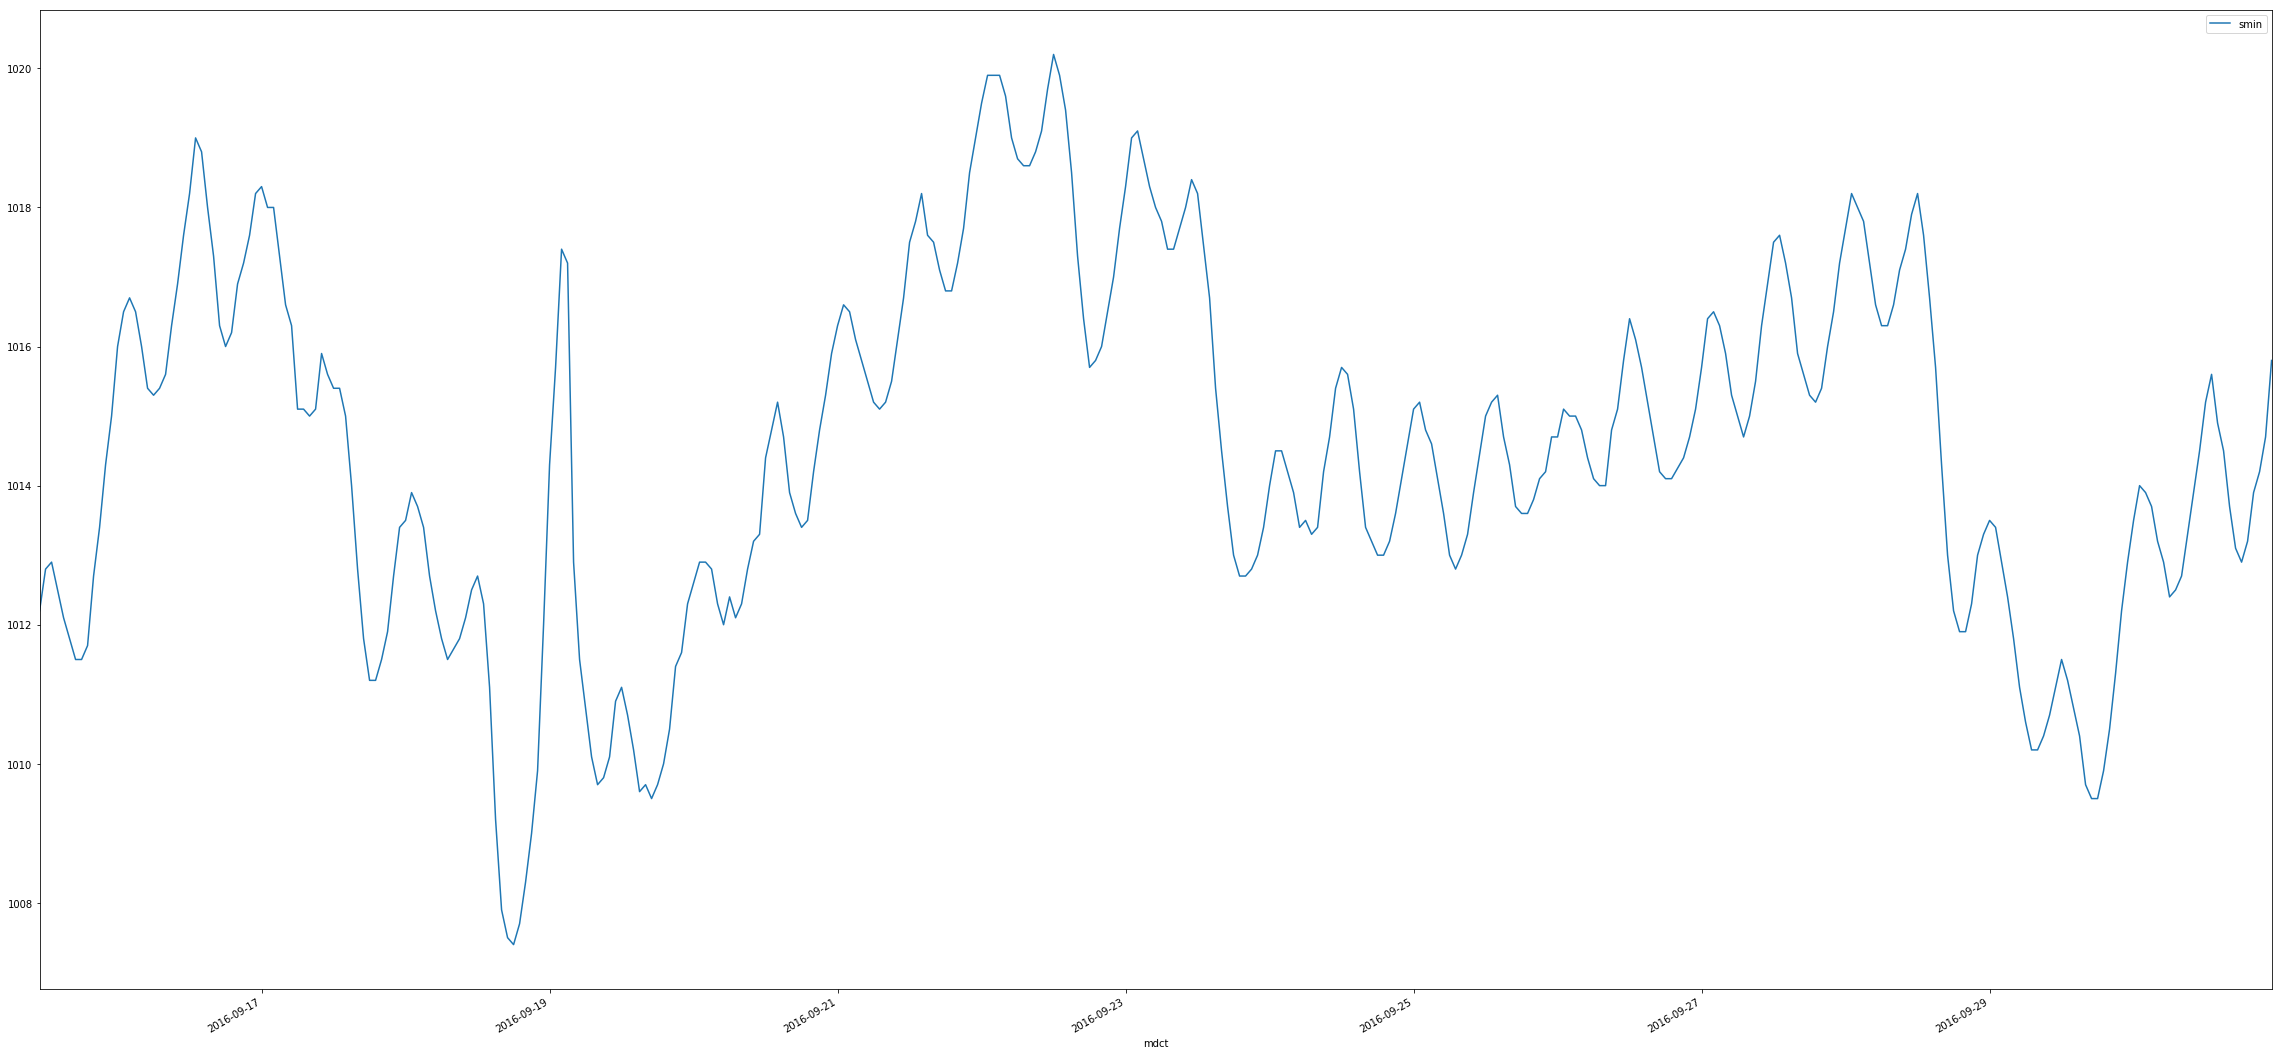

In [49]:
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(365)
station_384_tail_365 = station_384_tail_365.reset_index()


station_384_tail_365.plot(x='mdct', y='wdsp')
#station_384_tail_365.plot(x='mdct', y='wdct')
station_384_tail_365.plot(x='mdct', y='gust')
station_384_tail_365.plot(x='mdct', y='stp')
station_384_tail_365.plot(x='mdct', y='smax')
station_384_tail_365.plot(x='mdct', y='smin')


Check one day analysis

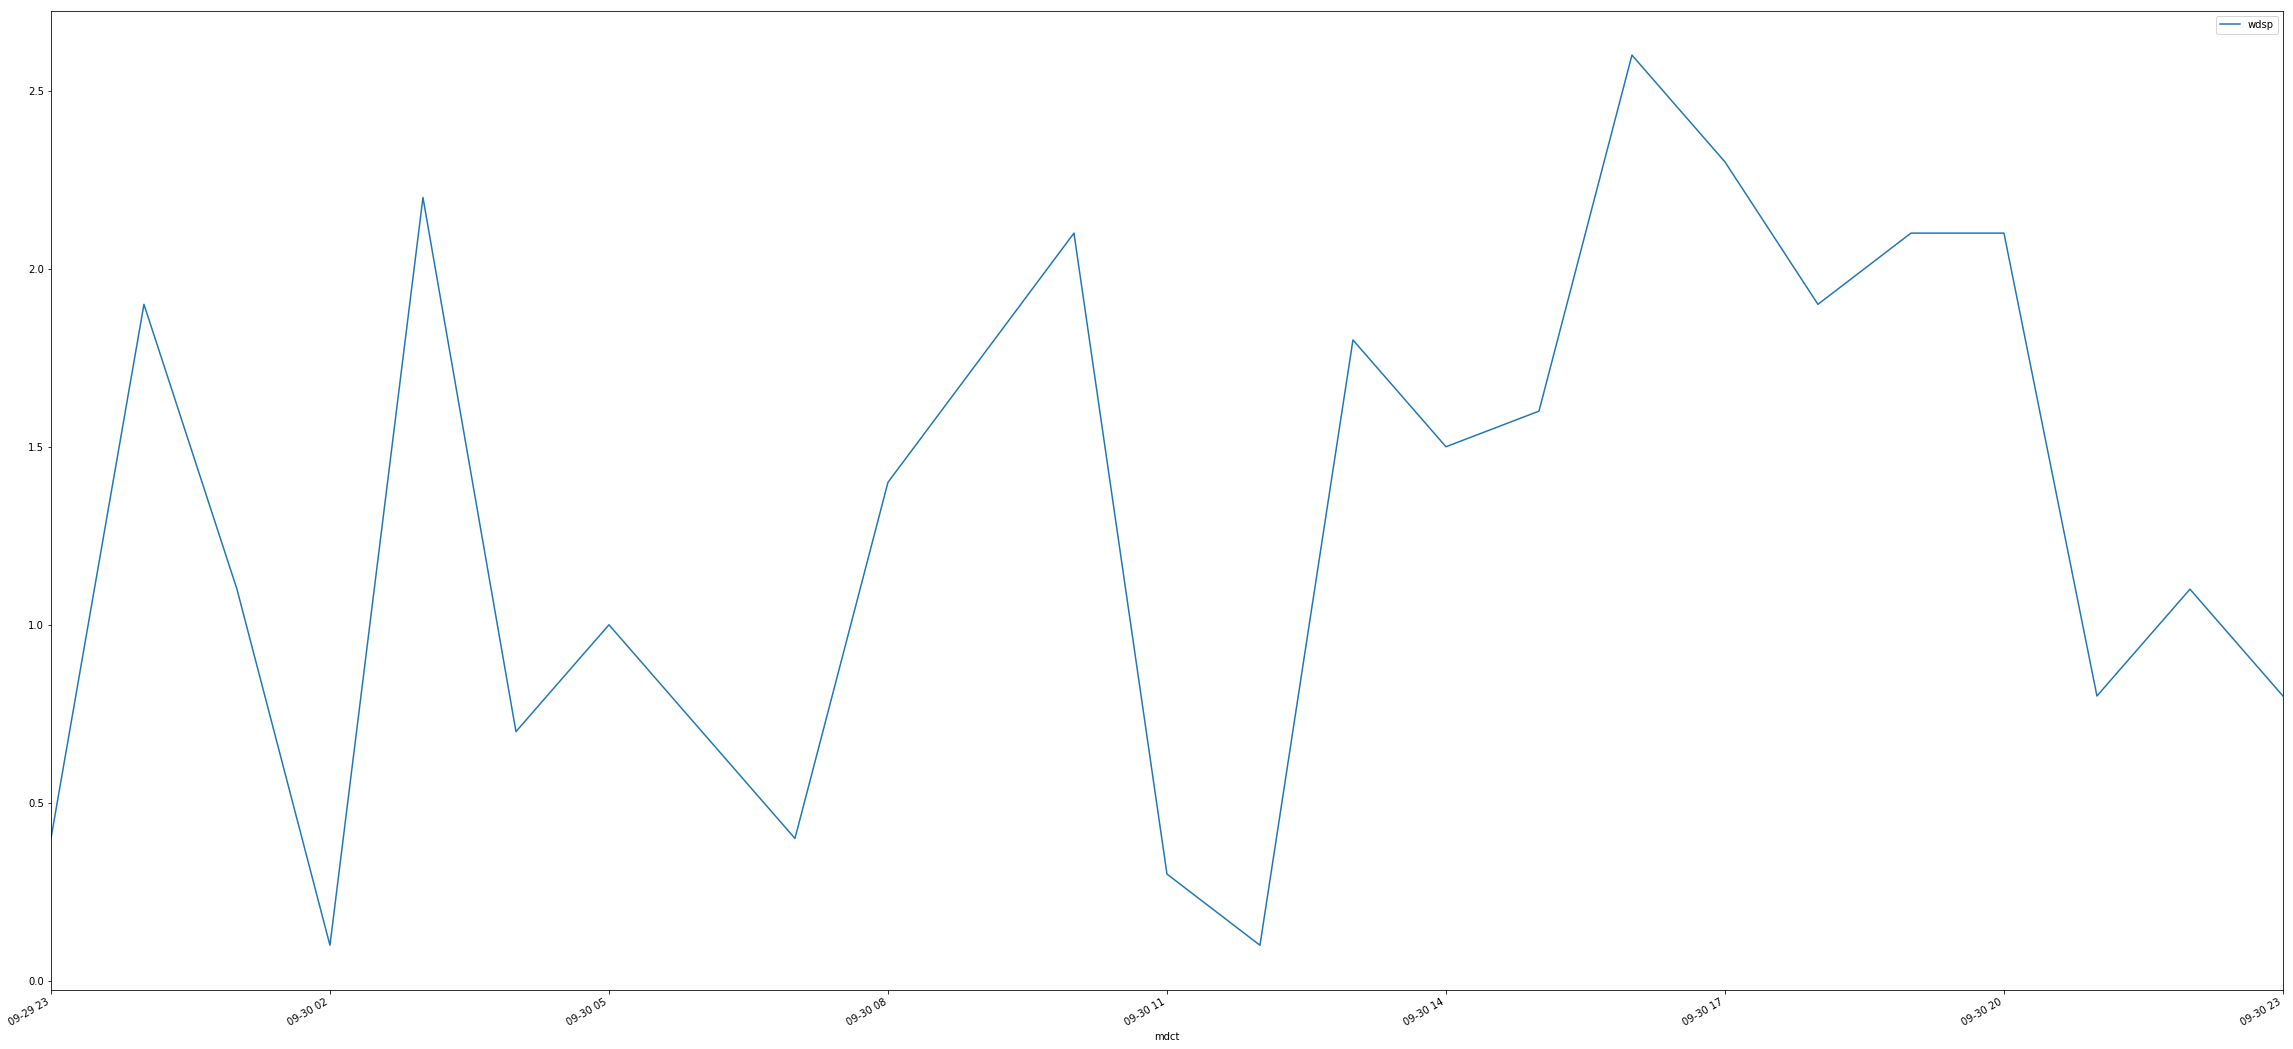

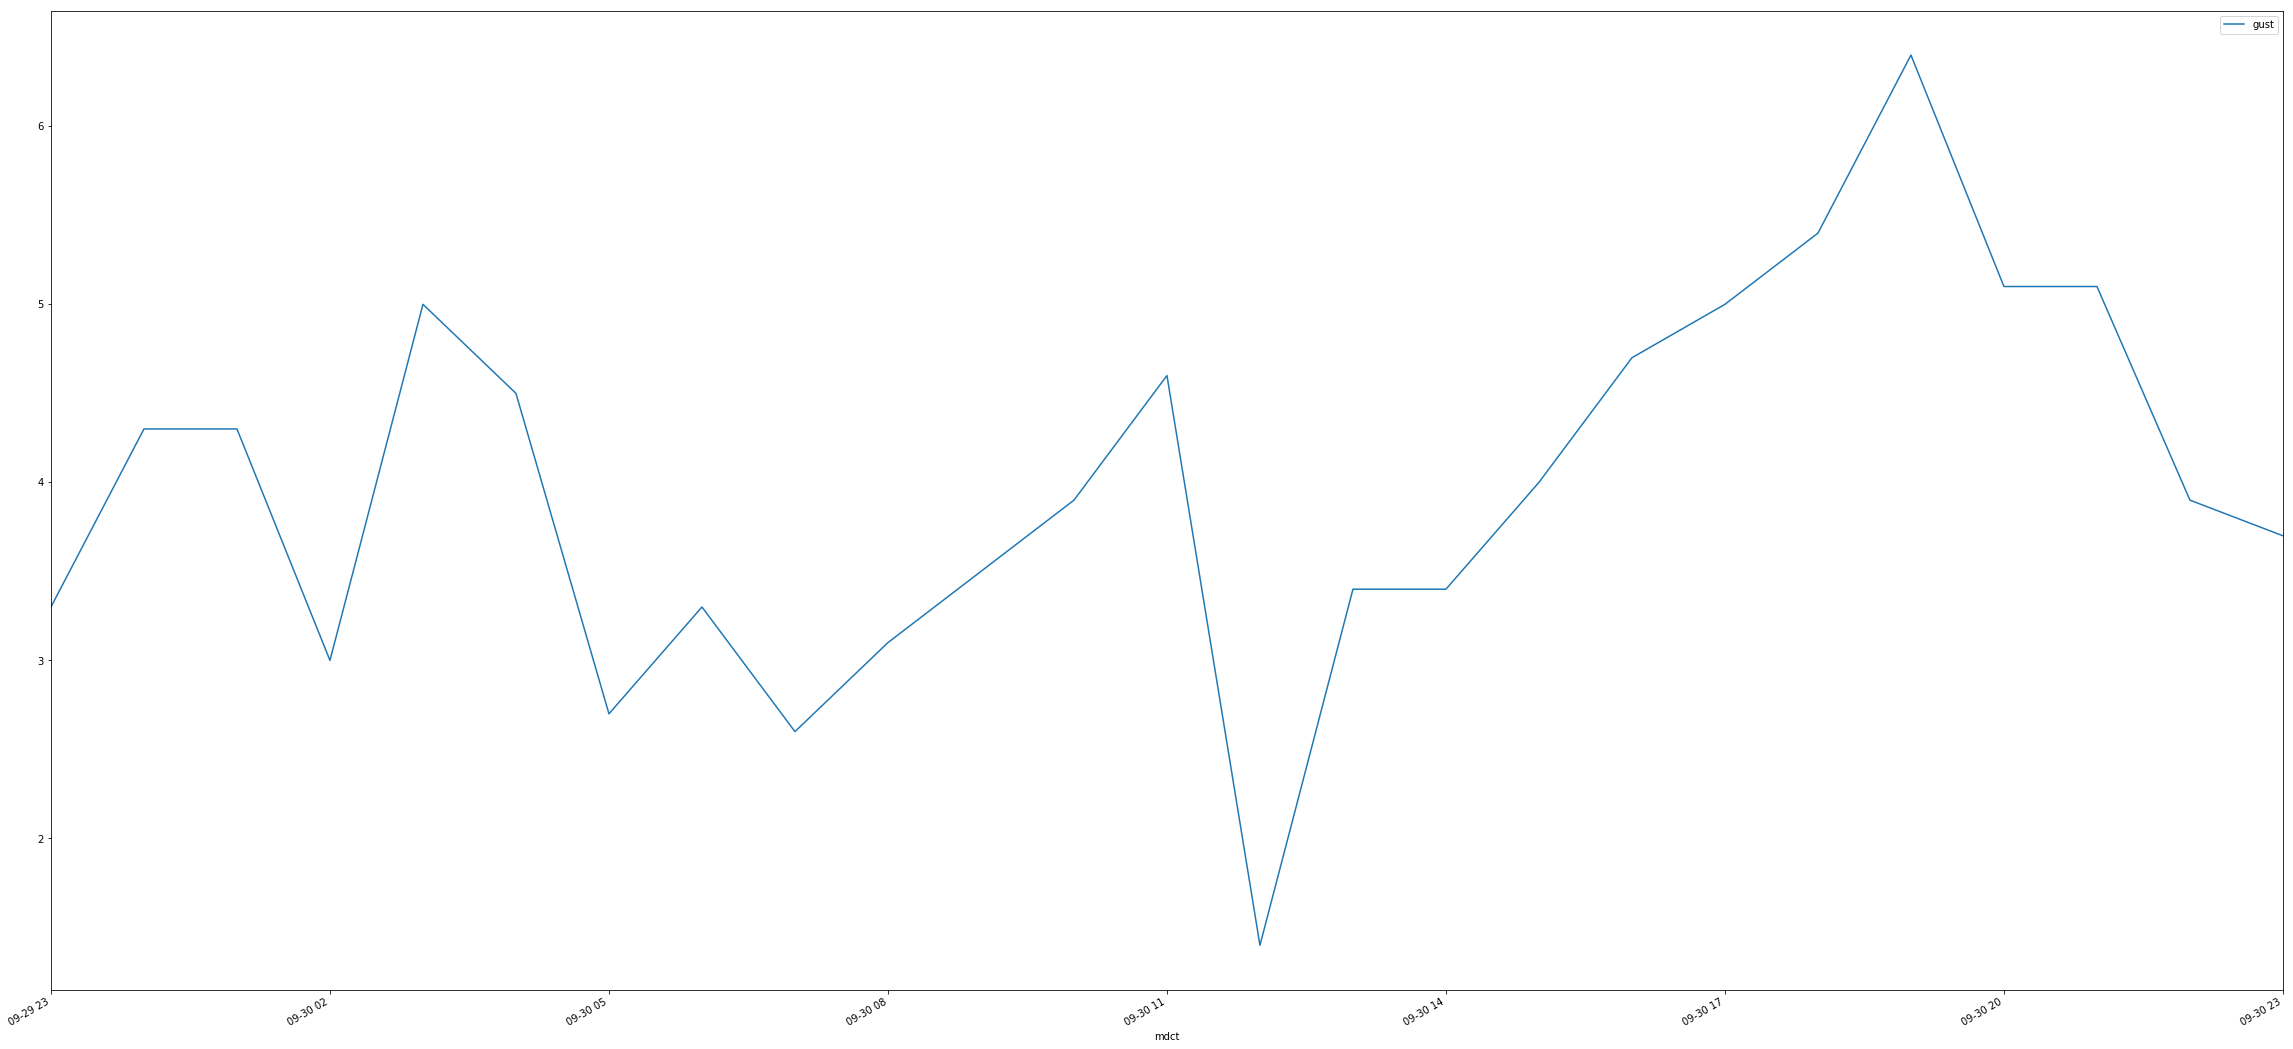

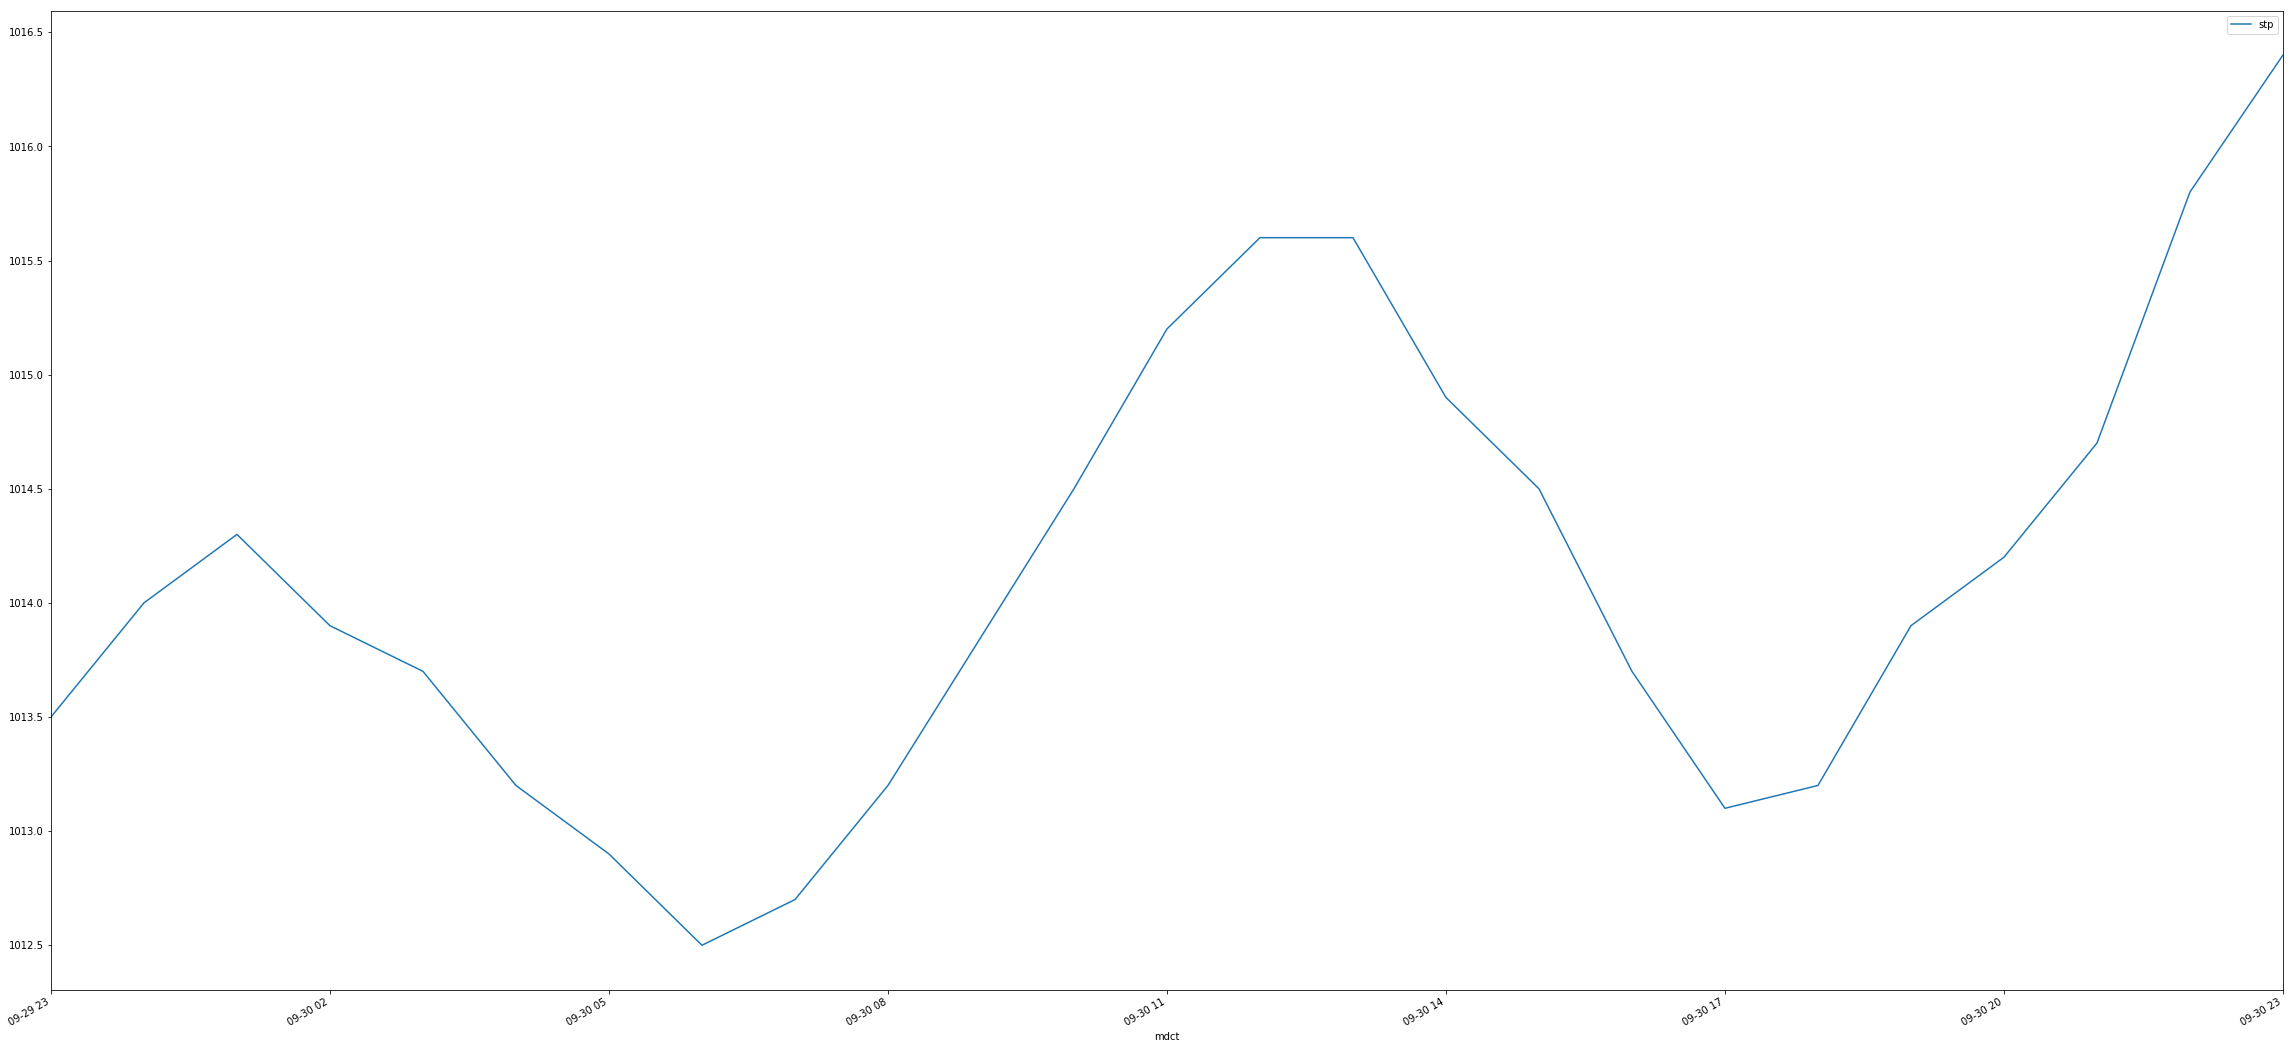

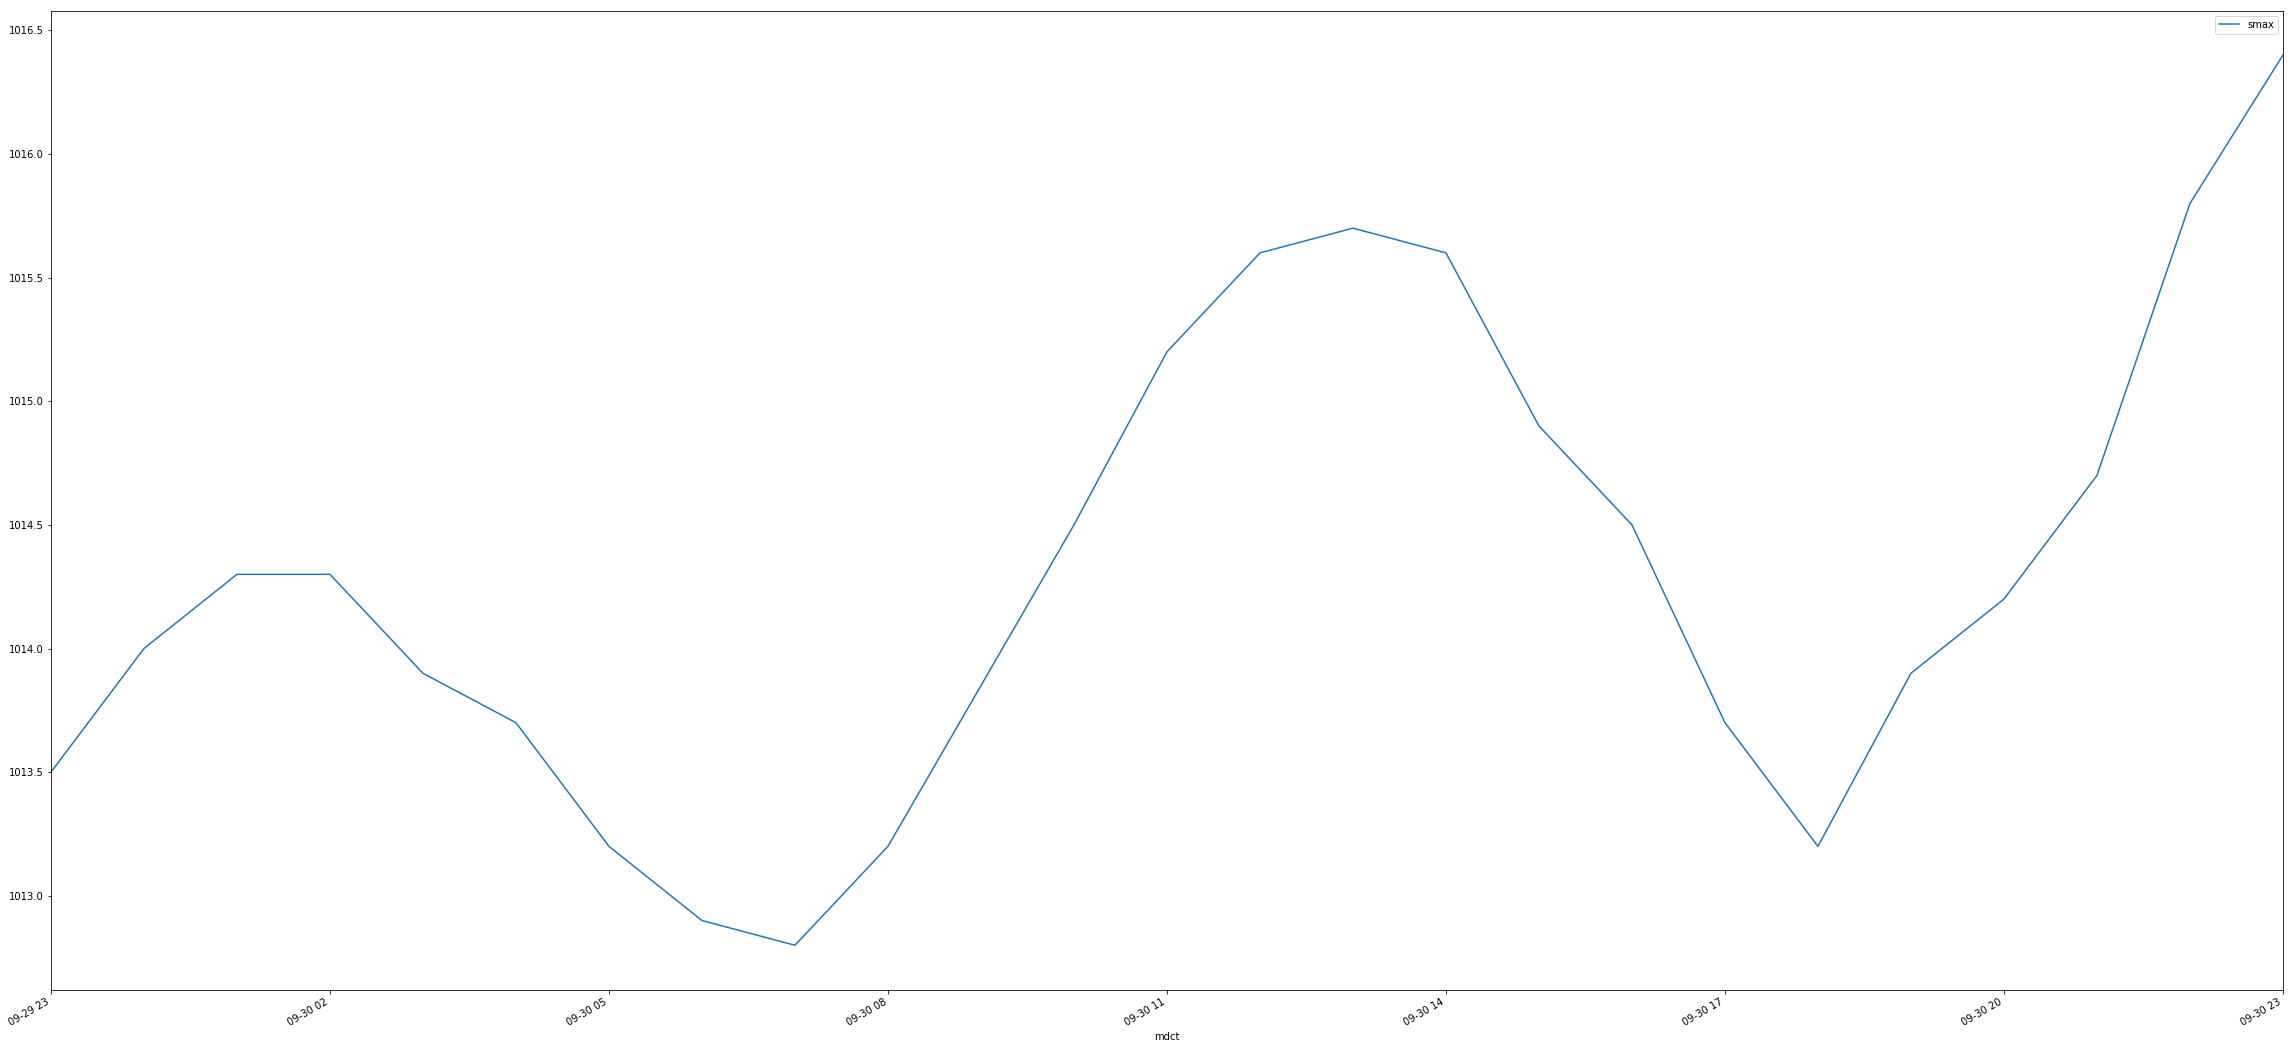

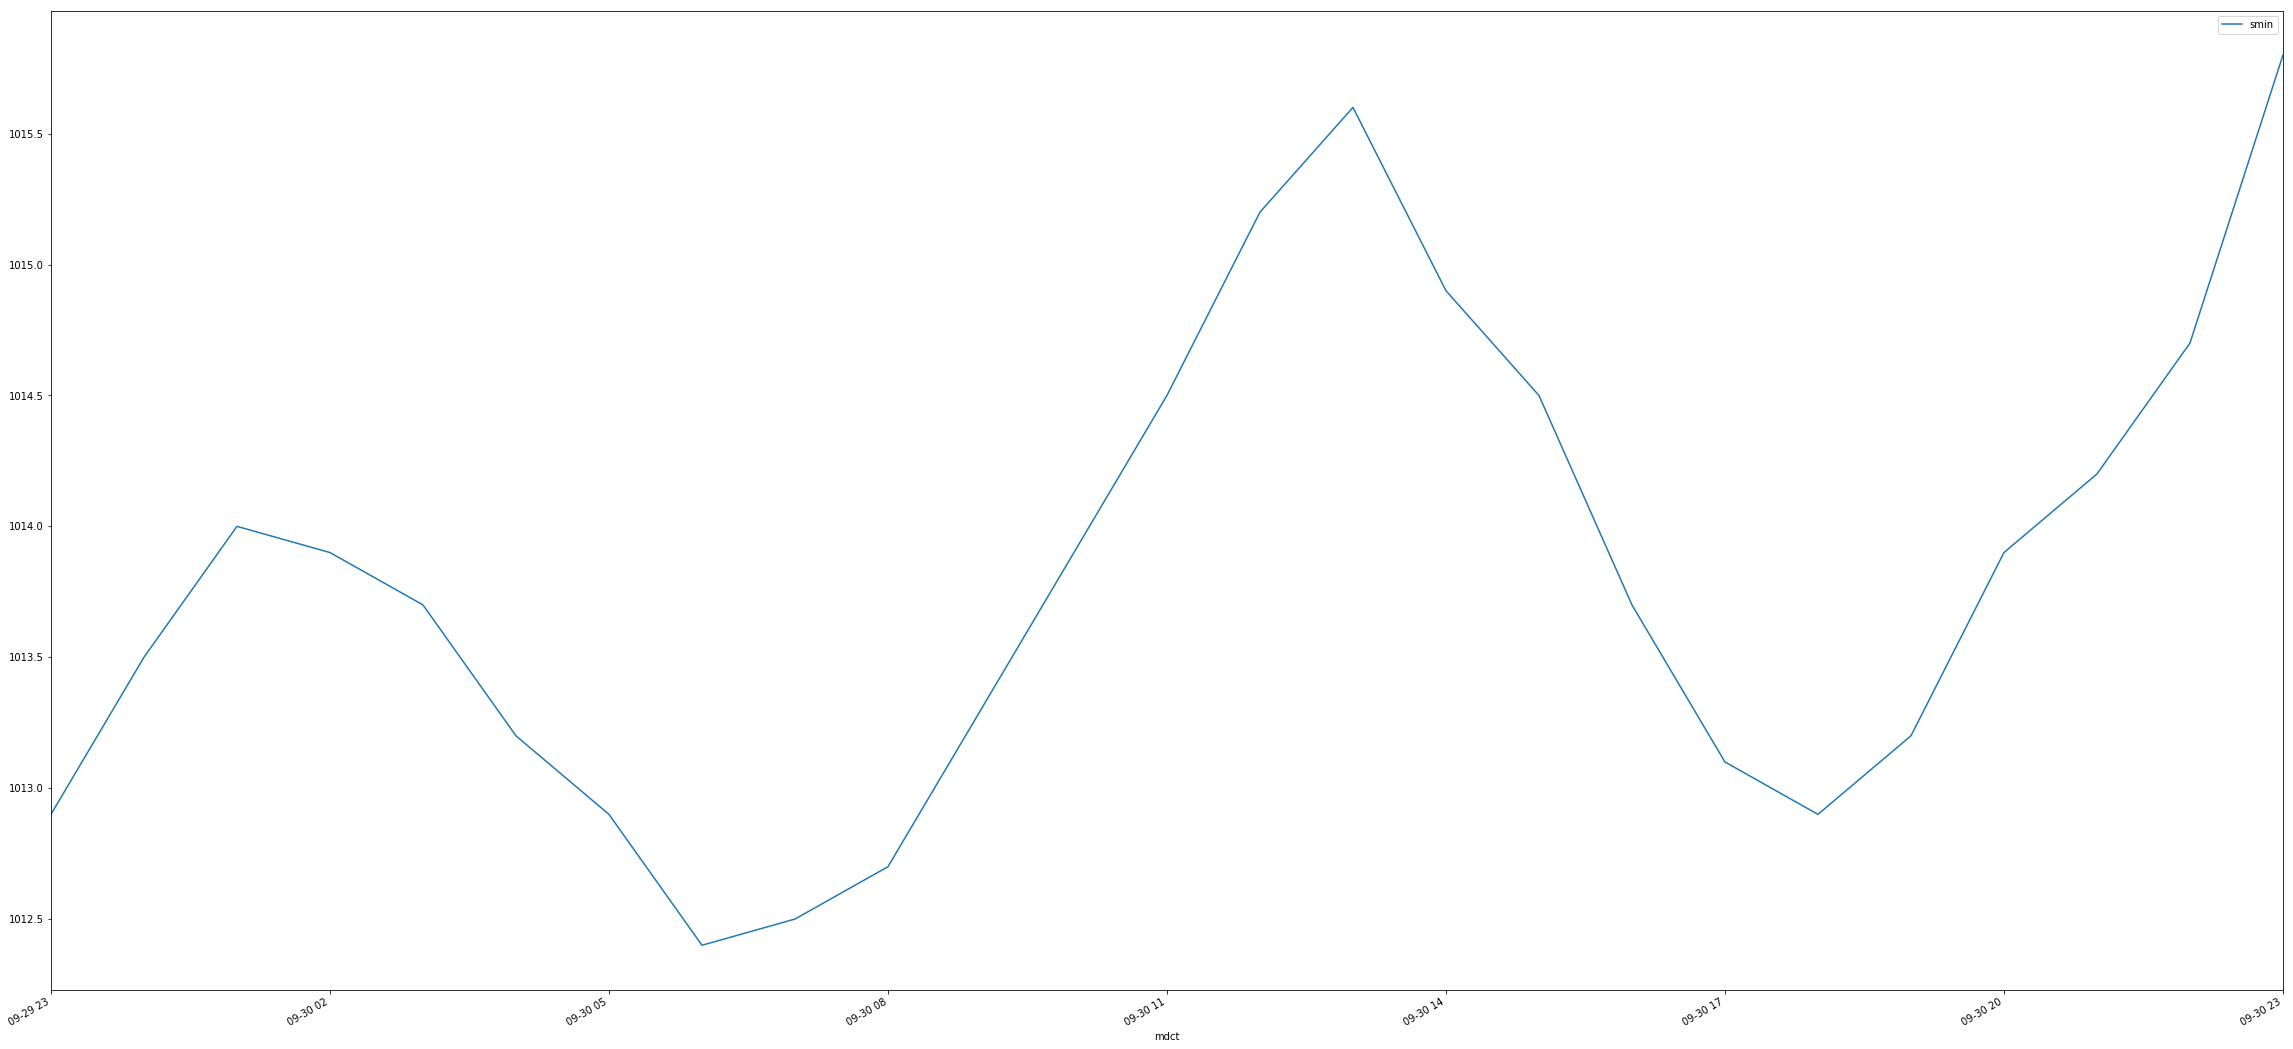

In [50]:
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(24)
station_384_tail_365 = station_384_tail_365.reset_index()

station_384_tail_365.plot(x='mdct', y='wdsp')
#station_384_tail_365.plot(x='mdct', y='wdct')
station_384_tail_365.plot(x='mdct', y='gust')
station_384_tail_365.plot(x='mdct', y='stp')
station_384_tail_365.plot(x='mdct', y='smax')
station_384_tail_365.plot(x='mdct', y='smin')

### Folium map of weather station location

In [52]:
a = df[['wsnm','lat','lon']].drop_duplicates()
for i in range(len(a)):
    print("folium.Marker([{}, {}], popup='<b>{}</b>', tooltip=tooltip).add_to(m)".format(a.lat.values[i], a.lon.values[i], a.wsnm.values[i]))


folium.Marker([-6.835777, -38.311583], popup='<b>SÃO GONÇALO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.271094, -40.306069], popup='<b>VITÓRIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.988388, -40.579572], popup='<b>SANTA TERESA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.356923000000002, -40.06868], popup='<b>LINHARES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.636526, -40.741818], popup='<b>ALFREDO CHAVES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.676198, -39.864051], popup='<b>SÃO MATEUS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.750412, -41.488852], popup='<b>ALEGRE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.100804999999998, -41.039395], popup='<b>PRES. KENNEDY</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.695265, -40.390572], popup='<b>NOVA VENECIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.104194, -41.106861], popup='<b>AFONSO CLAUDIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.228373, -43.767703

In [53]:
m = folium.Map(
    location=[-19.481935, -45.593932],
    zoom_start=4,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([-6.835777, -38.311583], popup='<b>SÃO GONÇALO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.271094, -40.306069], popup='<b>VITÓRIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.988388, -40.579572], popup='<b>SANTA TERESA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.356923000000002, -40.06868], popup='<b>LINHARES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.636526, -40.741818], popup='<b>ALFREDO CHAVES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.676198, -39.864051], popup='<b>SÃO MATEUS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.750412, -41.488852], popup='<b>ALEGRE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.100804999999998, -41.039395], popup='<b>PRES. KENNEDY</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.695265, -40.390572], popup='<b>NOVA VENECIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.104194, -41.106861], popup='<b>AFONSO CLAUDIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.228373, -43.767703000000004], popup='<b>BARBACENA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.605696, -46.949616999999996], popup='<b>ARAXÁ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.686316, -43.843763], popup='<b>MONTES CLAROS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.917072, -48.255657], popup='<b>UBERLÂNDIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.166773000000003, -40.687756], popup='<b>ALMENARA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.861604, -46.043365], popup='<b>MONTE VERDE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.762607, -42.864013], popup='<b>VIÇOSA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.573824, -42.622413], popup='<b>TIMÓTEO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.952907, -49.525071999999994], popup='<b>ITUIUTABA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.556592000000002, -43.75622], popup='<b>OURO BRANCO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.106502, -44.250928], popup='<b>S.J.DEL REI</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.566513, -45.4043], popup='<b>VARGINHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.745237, -46.633916], popup='<b>PASSOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.104867000000002, -42.375904], popup='<b>MURIAÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.769965, -43.364329], popup='<b>JUÍZ DE FORA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.53921, -49.518133], popup='<b>CAMPINA VERDE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.98586, -48.151574], popup='<b>CONC. DAS ALAGOAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.883945, -43.969397], popup='<b>BELO HOR. (PAMPULHA)</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.798799, -40.249933], popup='<b>SERRA DOS AIMORES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.996684, -46.985935], popup='<b>PATROCÍNIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.454929999999997, -45.453825], popup='<b>FORMIGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.875270999999998, -47.434102], popup='<b>SACRAMENTO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-14.408228, -44.404123], popup='<b>MONTALVANIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.89284, -41.515423], popup='<b>TEÓFILO OTONI</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.200854999999997, -45.459835999999996], popup='<b>TRÊS MARIAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.395799, -44.961909000000006], popup='<b>PASSA QUATRO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.918066, -46.382996], popup='<b>CALDAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.314567, -45.373049], popup='<b>MARIA DA FÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.830354, -41.977007], popup='<b>GOVERNADOR VALADARES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.786842, -42.942921000000005], popup='<b>GUANHÃES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.532768, -41.090801], popup='<b>AIMORES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.885398000000002, -44.416883], popup='<b>FLORESTAL</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.481935, -45.593932], popup='<b>DORES DO INDAIÁ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.231052, -43.648269], popup='<b>DIAMANTINA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.747711, -44.453784999999996], popup='<b>CURVELO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.085957999999998, -44.016036], popup='<b>MOCAMBINHO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.780620000000003, -40.986505], popup='<b>MANTENA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.705504, -42.389256], popup='<b>CAPELINHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.554101, -46.881935], popup='<b>UNAI</b>', tooltip=tooltip).add_to(m)
folium.Marker([-14.912284, -42.808473], popup='<b>ESPINOSA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.524262, -46.435536], popup='<b>BURITIS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.258064, -44.8356], popup='<b>PIRAPORA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.561349, -47.199251000000004], popup='<b>GUARDA-MOR</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.362747, -45.123801], popup='<b>SÃO ROMÃO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.300158999999999, -45.617430999999996], popup='<b>CHAPADA GAÚCHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.751535999999998, -41.457786999999996], popup='<b>ÁGUAS VERMELHAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.575667000000003, -41.485588], popup='<b>ITAOBIM</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.723139000000002, -42.43575], popup='<b>RIO PARDO DE MINAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.160327, -42.310266], popup='<b>SALINAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.78477, -46.119394], popup='<b>JOÃO PINHEIRO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.735757, -42.137146], popup='<b>CARATINGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.031457, -44.011249], popup='<b>IBIRITÈ (ROLA MOÇA)</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.263378, -42.182817], popup='<b>MANHUAÇU</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.546728, -43.261029], popup='<b>CORONEL PACHECO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.448089000000001, -44.366313], popup='<b>JANUARIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.239555, -45.008187], popup='<b>POMPEU</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.909892000000003, -47.114259000000004], popup='<b>SÃO SEBASTIAO DO PARAÍSO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.455288, -44.17338], popup='<b>SETE LAGOAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.980034, -43.958651], popup='<b>BELO HORIZONTE - CERCADINHO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.757868, -43.684843], popup='<b>ECOLOGIA AGRÍCOLA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.050334, -43.595684999999996], popup='<b>MARAMBAIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.589806, -43.282233000000005], popup='<b>XEREM</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.587729, -41.958327000000004], popup='<b>CAMBUCÍ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.975468, -42.02145], popup='<b>ARRAIAL DO CABO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.041647, -41.051871000000006], popup='<b>CAMPOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.376317999999998, -41.812053000000006], popup='<b>MACAÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.450924, -44.444786], popup='<b>RESENDE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.464889000000003, -43.291505], popup='<b>PICO DO COUTO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.358094, -43.695656], popup='<b>VALENÇA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.448922, -42.987146], popup='<b>TERESÓPOLIS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.22354, -44.726863], popup='<b>PARATÍ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.041647, -41.051871000000006], popup='<b>SÃO TOMÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.861322, -43.41141], popup='<b>VILA MILITAR</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.334839000000002, -42.676932], popup='<b>NOVA FRIBURGO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.098391, -43.208574], popup='<b>TRÊS RIOS </b>', tooltip=tooltip).add_to(m)
folium.Marker([-13.453981, -56.677323], popup='<b>RIO CLARO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.988286, -43.190436], popup='<b>FORTE DE COPACABANA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.645910999999998, -42.415775], popup='<b>SILVA JARDIM</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.871321, -42.609219], popup='<b>SAQUAREMA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.496294, -46.620088], popup='<b>SAO PAULO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.358052, -49.028877], popup='<b>BAURU</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.750231, -45.603836], popup='<b>CAMPOS DO JORDÃO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.119867000000003, -51.408637], popup='<b>PRESIDENTE PRUDENTE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.584475, -47.382549], popup='<b>FRANCA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.980353, -47.883927], popup='<b>SÃO CARLOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-24.671654, -47.545896], popup='<b>IGUAPE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.426035, -47.585552], popup='<b>SOROCABA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.981918, -48.885818], popup='<b>ITAPEVA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.852022, -48.164817], popup='<b>S. MIG. ARCANJO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.949, -49.894546000000005], popup='<b>OURINHOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.372832, -50.974709999999995], popup='<b>RANCHARIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.101748999999998, -48.940996999999996], popup='<b>AVARÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.703132, -47.623317], popup='<b>PIRACICABA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.666045, -49.734854], popup='<b>LINS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.041667999999998, -45.520841], popup='<b>TAUBATÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.403221, -49.966031], popup='<b>VOTUPORANGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.165025, -50.595134], popup='<b>JALES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.319138, -50.930158], popup='<b>VALPARAISO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.085675, -49.920388], popup='<b>JOSÉ BONIFÁCIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.132937, -48.840426], popup='<b>ARIRANHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.855567, -48.799717], popup='<b>IBITINGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.78056, -47.07528], popup='<b>CASA BRANCA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.415062, -46.805292], popup='<b>ITAPIRA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.228362, -45.417055], popup='<b>S LUIS DO PARAITINGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.471204999999998, -48.557573], popup='<b>BARRA BONITA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.993611, -46.256389], popup='<b>MOELA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-24.962819, -48.416379], popup='<b>BARRA DO TURVO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.338432, -48.114007], popup='<b>PRADÓPOLIS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.559175, -48.544996999999995], popup='<b>BARRETOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.35976, -47.775220000000004], popup='<b>ITUVERAVA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.523889999999998, -46.86945], popup='<b>BARUERI</b>', tooltip=tooltip).add_to(m)

m

2 stations are labelled incorrectly for latitude and longitude (not in SE Brazil). 
Rio Claro and SÃO GONÇALO are common names in Brazil. Digging deeper into it, we see that there are the same named cities in the correctly labeled province:  
https://en.wikipedia.org/wiki/Rio_Claro,_Rio_de_Janeiro
https://en.wikipedia.org/wiki/S%C3%A3o_Gon%C3%A7alo,_Rio_de_Janeiro

Let's go ahead and update the lat and lon values for these two stations
Rio Claro = 22°43′22″S 44°08′09″W = -22.722778, -44.135833
SÃO GONÇALO = 22°49′37″S 43°03′14″W = -22.826944, -43.053889

In [54]:
df[df['wsnm']=='SÃO GONÇALO'].head(2)

wsid         wsnm   elvt       lat        lon  inme  \
mdct                                                                       
2007-11-06 00:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   
2007-11-06 01:00:00   178  SÃO GONÇALO  237.0 -6.835777 -38.311583  A333   

                            city prov        date    yr  mo  da  hr  prcp  \
mdct                                                                        
2007-11-06 00:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   0   0.0   
2007-11-06 01:00:00  São Gonçalo   RJ  2007-11-06  2007  11   6   1   0.0   

                       stp   smax   smin  gbrd  temp  dewp  tmax  dmax  tmin  \
mdct                                                                           
2007-11-06 00:00:00  982.5  982.5  981.3   0.0  29.3  12.1  29.7  16.8  25.5   
2007-11-06 01:00:00  983.2  983.2  982.5   0.0  29.0  13.5  29.9  13.6  29.0   

                     dmin  hmdy  hmax  hmin  wdsp   wdct  gust  
mdct                                                            
2007-11-06 00:00:00  10.8  35.0  58.0  32.0   3.2  101.0   6.5  
2007-11-06 01:00:00  12.2  39.0  39.0  35.0   3.6   94.0   6.4

In [55]:
df[df['wsnm']=='RIO CLARO'].head(2)

wsid       wsnm   elvt        lat        lon  inme  \
mdct                                                                      
2016-06-06 22:00:00   387  RIO CLARO  340.0 -13.453981 -56.677323  A903   
2016-06-06 23:00:00   387  RIO CLARO  340.0 -13.453981 -56.677323  A903   

                          city prov        date    yr  mo  da  hr  prcp  \
mdct                                                                      
2016-06-06 22:00:00  Rio Claro   RJ  2016-06-06  2016   6   6  22   0.0   
2016-06-06 23:00:00  Rio Claro   RJ  2016-06-06  2016   6   6  23   0.0   

                       stp   smax   smin  gbrd  temp  dewp  tmax  dmax  tmin  \
mdct                                                                           
2016-06-06 22:00:00  951.7  951.7  951.2   0.0  22.7  21.8  23.4  22.0  22.7   
2016-06-06 23:00:00  953.1  953.2  951.7   0.0  21.3  20.5  22.8  21.8  21.3   

                     dmin  hmdy  hmax  hmin  wdsp   wdct  gust  
mdct                                                            
2016-06-06 22:00:00  21.6  95.0  95.0  91.0   1.8   89.0   4.6  
2016-06-06 23:00:00  20.5  95.0  96.0  93.0   2.1  153.0   5.6

In [56]:
df.loc[df['wsnm']=='RIO CLARO','lat'] = -22.722778
df.loc[df['wsnm']=='RIO CLARO','lon'] = -44.135833
df.loc[df['wsnm']=='SÃO GONÇALO','lat'] = -22.826944
df.loc[df['wsnm']=='SÃO GONÇALO','lon'] = -43.053889

Let's save the cleaned up df now. 

In [66]:
df.to_hdf('cleaned_df.hdf','mydata',mode='w')

In [67]:
df = pd.read_hdf('cleaned_df.hdf','mydata')

### Note about cleaning time series data from multiple sensors

Even after all this cleanup, there is still not much you can do about missing chunks of data from a weather station. The two examples below show, that even with interpolation, we are quite limited. Overall, it is difficult to get realiable data from over a 16 year period. The first graph shows a big chunk of data missing for  2004 and some of 2005, with one small line connecting the two.

The graph below that shows a much cleaner dataset/weather station.

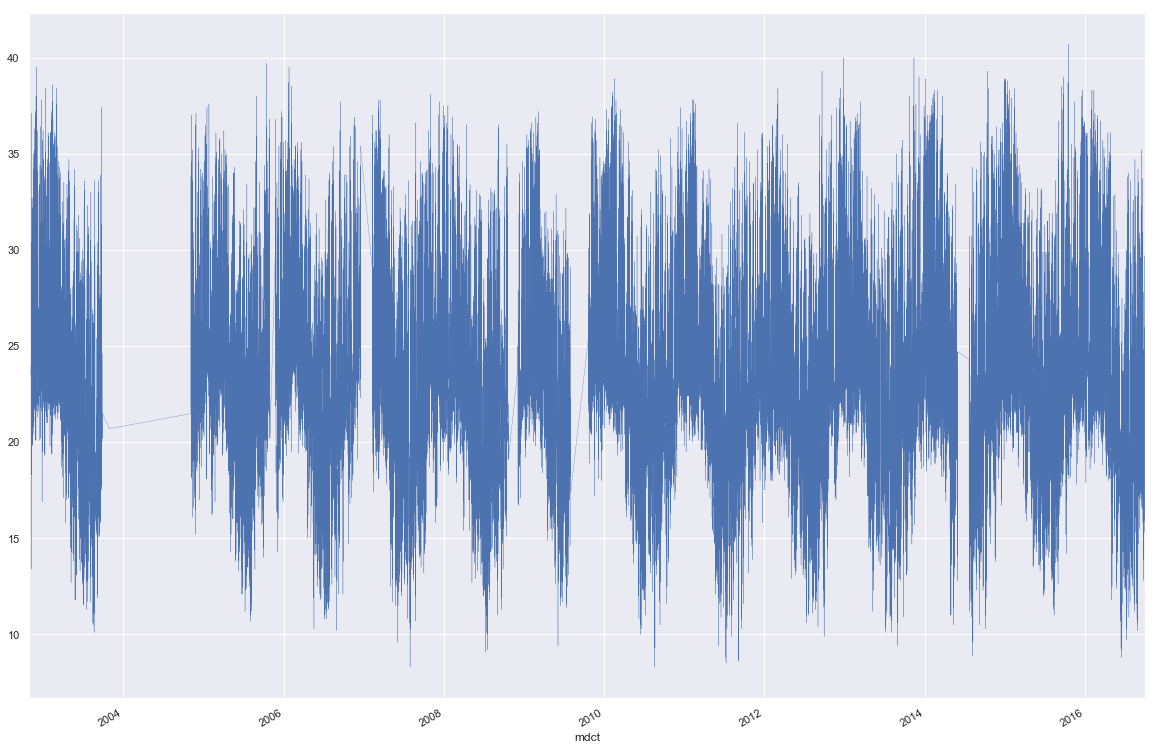

In [64]:
sns.set(rc={'figure.figsize':(20, 14)})
is_373 = df['wsid'] == 373
station_373 = df[is_373]
station_373['temp'].plot(linewidth=0.3);

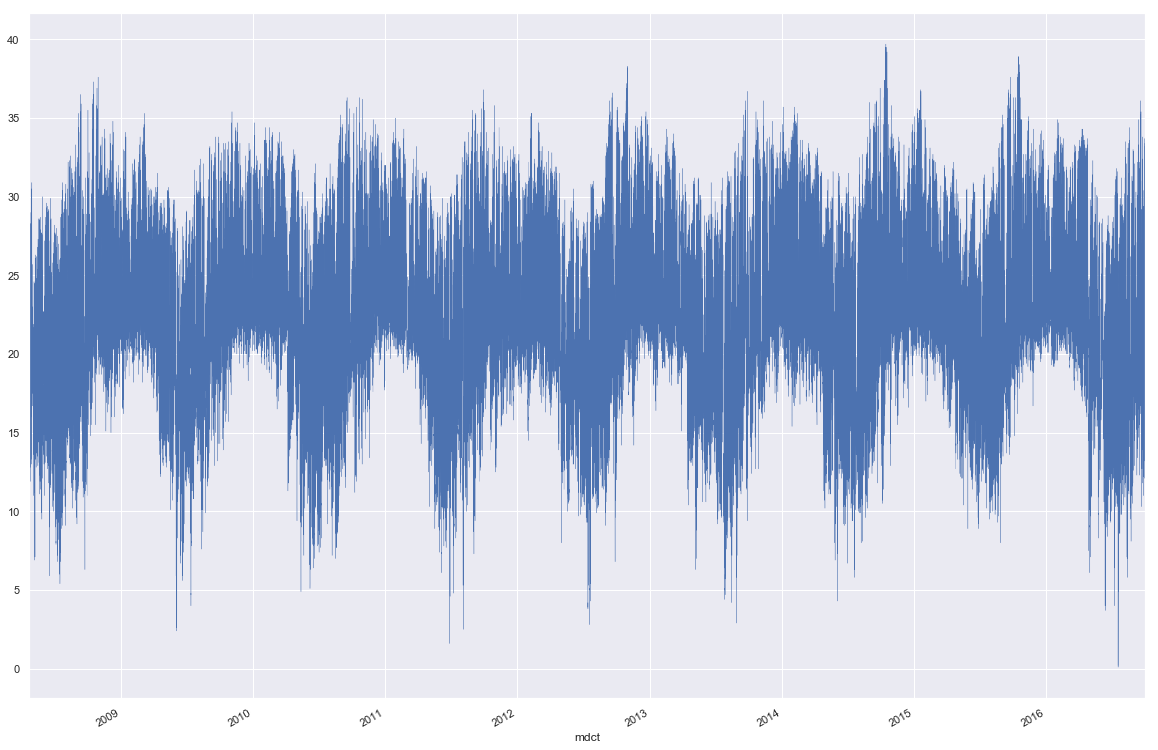

In [65]:
sns.set(rc={'figure.figsize':(20, 14)})
is_420 = df['wsid'] == 420
station_420 = df[is_420]

station_420['temp'].plot(linewidth=0.3);


# Fun facts and graphs

Let's play with some of the data now. Let's get 30 days of data from one station, get the average max and min temperatures by grouping on the entire day, and plotting to see how the temperature fluctuates in a day. 

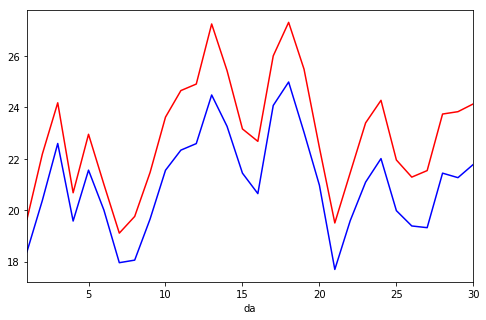

In [58]:
is_420 = df['wsid'] == 420
station_420 = df[is_420]
station_420_month = station_420.tail(720)
station_420_month_tmax = station_420_month['tmax'].groupby(station_420_month['da'])
station_420_month_tmin = station_420_month['tmin'].groupby(station_420_month['da'])
tmax_mean = station_420_month_tmax.mean()
tmin_mean = station_420_month_tmin.mean()
plt.figure()
tmax_mean.plot(color='red', figsize=[8,5])
tmin_mean.plot(color='blue')

Let's see what the warmest and coldest temperatures for each year and which city it happens in:

In [59]:
index = []
year = []
city = []
tmax = []

for i in df.yr.unique():
    k = df.loc[df['yr'] == int(i)].tmax.nlargest()
    for w in range(5):
        try:
            g = df.loc[k.index[w]][df.loc[k.index[w]].tmax == k[w]]
            city.append(g.iloc[0]['city'])
            year.append(i)
            index.append(k.index[w])
            tmax.append(k[w])
        except:
            pass
        
df1 = pd.DataFrame({'date': index,'city': city,'tmax': tmax, 'year':year})
df1

date             city       tmax  year
0  2007-10-29 17:00:00      Montalvânia  40.200000  2007
1  2007-11-02 17:00:00          Itaobim  40.000000  2007
2  2007-10-28 19:00:00      Montalvânia  39.700000  2007
3  2007-11-20 17:00:00      Montalvânia  39.700000  2007
4  2007-11-20 18:00:00      Montalvânia  39.700000  2007
5  2008-10-28 18:00:00      Porteirinha  41.300000  2008
6  2008-10-28 19:00:00        São Romão  41.000000  2008
7  2008-10-28 17:00:00        São Romão  40.800000  2008
8  2008-10-28 18:00:00        São Romão  40.800000  2008
9  2008-11-06 17:00:00      Montalvânia  40.700000  2008
10 2009-09-02 18:00:00     Nova Venécia  44.300000  2009
11 2009-03-15 19:00:00          Itaobim  40.100000  2009
12 2009-03-15 18:00:00          Itaobim  39.900000  2009
13 2009-03-15 20:00:00          Itaobim  39.700000  2009
14 2009-09-29 18:00:00          Itaobim  39.700000  2009
15 2010-11-20 16:00:00         Ariranha  41.900000  2010
16 2010-11-20 17:00:00         Ariranha  41.700000  2010
17 2010-02-24 19:00:00          Cambuci  41.000000  2010
18 2010-02-09 15:00:00            Macaé  40.800000  2010
19 2010-02-24 17:00:00           Alegre  40.600000  2010
20 2011-08-12 19:00:00       Valparaíso  44.300000  2011
21 2011-08-12 20:00:00       Valparaíso  43.400000  2011
22 2011-08-12 18:00:00       Valparaíso  42.200000  2011
23 2011-08-12 17:00:00       Valparaíso  41.600000  2011
24 2011-08-12 16:00:00       Valparaíso  40.900000  2011
25 2012-03-02 18:00:00   Afonso Cláudio  45.000000  2012
26 2012-04-24 13:00:00         Pirapora  44.800000  2012
27 2012-05-11 14:00:00         Pirapora  44.800000  2012
28 2012-04-24 12:00:00         Pirapora  44.700000  2012
29 2012-02-12 18:00:00   Afonso Cláudio  44.600000  2012
30 2013-12-20 11:00:00        São Romão  45.000000  2013
31 2013-12-28 00:00:00        São Romão  44.000000  2013
32 2013-08-23 17:00:00       Valparaíso  43.900000  2013
33 2013-12-28 01:00:00        São Romão  43.889744  2013
34 2013-12-27 23:00:00        São Romão  43.852885  2013
35 2014-01-04 15:00:00        São Romão  43.900000  2014
36 2014-01-04 14:00:00        São Romão  43.852000  2014
37 2014-01-04 13:00:00        São Romão  43.804000  2014
38 2014-01-04 12:00:00        São Romão  43.756000  2014
39 2014-01-04 11:00:00        São Romão  43.708000  2014
40 2015-10-16 15:00:00   Rio de Janeiro  42.400000  2015
41 2015-10-16 16:00:00   Rio de Janeiro  42.200000  2015
42 2015-10-15 17:00:00   Rio de Janeiro  42.100000  2015
43 2015-10-16 17:00:00   Rio de Janeiro  42.100000  2015
44 2015-10-24 15:00:00         Barretos  41.800000  2015
45 2016-01-02 19:00:00          Itaobim  42.300000  2016
46 2016-01-02 19:00:00         Almenara  42.100000  2016
47 2016-01-02 17:00:00          Itaobim  42.100000  2016
48 2016-01-02 18:00:00          Itaobim  41.900000  2016
49 2016-01-02 21:00:00          Itaobim  41.800000  2016
50 2006-01-25 19:00:00  Duque de Caxias  40.500000  2006
51 2006-01-25 20:00:00          Cambuci  40.500000  2006
52 2006-01-25 18:00:00  Duque de Caxias  40.200000  2006
53 2006-01-26 19:00:00          Cambuci  39.900000  2006
54 2006-01-25 17:00:00  Duque de Caxias  39.700000  2006
55 2003-03-02 17:00:00       Seropédica  39.500000  2003
56 2003-02-13 17:00:00   Rio de Janeiro  39.200000  2003
57 2003-02-13 16:00:00   Rio de Janeiro  39.100000  2003
58 2003-03-02 19:00:00  Duque de Caxias  39.000000  2003
59 2003-02-13 19:00:00  Duque de Caxias  38.900000  2003
60 2004-01-23 13:00:00   Rio de Janeiro  39.600000  2004
61 2004-01-23 14:00:00   Rio de Janeiro  39.000000  2004
62 2004-10-31 18:00:00   Rio de Janeiro  38.800000  2004
63 2004-11-05 16:00:00   Rio de Janeiro  38.800000  2004
64 2004-11-05 17:00:00       Seropédica  38.300000  2004
65 2005-10-14 17:00:00   Rio de Janeiro  40.200000  2005
66 2005-10-14 19:00:00  Duque de Caxias  39.800000  2005
67 2005-10-14 18:00:00  Duque de Caxias  39.700000  2005
68 2005-10-14 18:00:00       Seropédica  39.500000  2005
69 2005-10-14 19:00:00      

In [60]:
index = []
city = []
tmin = []
year = []

for i in df.yr.unique():
    k = df.loc[df['yr'] == int(i)].tmin.nsmallest()
    for w in range(5):
        try:
            g = df.loc[k.index[w]][df.loc[k.index[w]].tmin == k[w]]
            city.append(g.iloc[0]['city'])
            year.append(i)
            index.append(k.index[w])
            tmin.append(k[w])
        except:
            pass
        
df2 = pd.DataFrame({'date': index,'city': city,'tmin': tmin,'year':year})
df2

date              city      tmin  year
0  2007-07-30 10:00:00  Campos do Jordão -2.300000  2007
1  2007-07-30 09:00:00  Campos do Jordão -1.600000  2007
2  2007-07-30 11:00:00  Campos do Jordão -1.600000  2007
3  2007-07-30 08:00:00       Camanducaia -1.100000  2007
4  2007-07-30 10:00:00       Maria da Fé -1.000000  2007
5  2008-07-15 10:00:00       Camanducaia -2.200000  2008
6  2008-07-15 09:00:00       Camanducaia -2.000000  2008
7  2008-07-15 11:00:00       Camanducaia -1.800000  2008
8  2008-07-15 08:00:00       Camanducaia -1.700000  2008
9  2008-07-16 10:00:00       Camanducaia -1.700000  2008
10 2009-06-04 11:00:00       Camanducaia -1.800000  2009
11 2009-06-04 02:00:00       Camanducaia -1.600000  2009
12 2009-06-04 03:00:00       Camanducaia -1.600000  2009
13 2009-06-04 09:00:00       Camanducaia -1.300000  2009
14 2009-06-04 10:00:00       Camanducaia -1.200000  2009
15 2010-08-18 10:00:00       Camanducaia -2.700000  2010
16 2010-08-18 11:00:00       Camanducaia -2.500000  2010
17 2010-08-18 08:00:00       Camanducaia -2.100000  2010
18 2010-08-07 10:00:00       Camanducaia -2.000000  2010
19 2010-08-07 09:00:00       Camanducaia -1.800000  2010
20 2011-06-28 11:00:00         Rancharia -3.700000  2011
21 2011-08-05 07:00:00       Camanducaia -3.600000  2011
22 2011-06-28 10:00:00         Rancharia -3.600000  2011
23 2011-08-05 05:00:00       Camanducaia -3.500000  2011
24 2011-08-05 06:00:00       Camanducaia -3.500000  2011
25 2012-05-07 08:00:00          Pirapora -8.500000  2012
26 2012-05-09 22:00:00          Pirapora -7.300000  2012
27 2012-04-25 23:00:00          Pirapora -5.700000  2012
28 2012-05-09 23:00:00          Pirapora -4.622222  2012
29 2012-05-10 00:00:00          Pirapora -1.944444  2012
30 2013-08-29 10:00:00       Camanducaia -1.500000  2013
31 2013-08-28 10:00:00         Rancharia -1.400000  2013
32 2013-08-16 10:00:00       Camanducaia -1.100000  2013
33 2013-08-29 09:00:00       Camanducaia -1.100000  2013
34 2013-08-28 11:00:00         Rancharia -1.000000  2013
35 2014-08-08 10:00:00     Nova Friburgo -1.100000  2014
36 2014-08-06 10:00:00       Maria da Fé -0.900000  2014
37 2014-08-08 09:00:00     Nova Friburgo -0.900000  2014
38 2014-08-07 10:00:00       Maria da Fé -0.800000  2014
39 2014-08-06 09:00:00       Maria da Fé -0.700000  2014
40 2015-06-27 10:00:00       Maria da Fé -0.300000  2015
41 2015-06-27 09:00:00       Maria da Fé -0.100000  2015
42 2015-06-27 08:00:00       Maria da Fé  0.100000  2015
43 2015-06-27 11:00:00       Maria da Fé  0.300000  2015
44 2015-06-27 10:00:00  Campos do Jordão  0.500000  2015
45 2016-06-13 09:00:00    Barra do Turvo -3.600000  2016
46 2016-06-13 10:00:00    Barra do Turvo -3.600000  2016
47 2016-06-13 11:00:00    Barra do Turvo -3.600000  2016
48 2016-06-13 08:00:00    Barra do Turvo -3.500000  2016
49 2016-07-18 10:00:00       Camanducaia -3.400000  2016
50 2006-07-06 09:00:00       Camanducaia -0.900000  2006
51 2006-07-06 10:00:00       Camanducaia -0.800000  2006
52 2006-07-06 08:00:00       Camanducaia -0.500000  2006
53 2006-05-04 10:00:00       Camanducaia -0.400000  2006
54 2006-08-22 08:00:00       Camanducaia -0.300000  2006
55 2003-12-27 15:00:00    Rio de Janeiro -6.900000  2003
56 2003-12-27 12:00:00    Rio de Janeiro -6.800000  2003
57 2003-12-27 18:00:00    Rio de Janeiro -6.800000  2003
58 2003-12-27 16:00:00    Rio de Janeiro -6.700000  2003
59 2003-12-27 13:00:00    Rio de Janeiro -5.400000  2003
60 2004-01-05 17:00:00    Rio de Janeiro -0.300000  2004
61 2004-01-08 12:00:00    Rio de Janeiro  1.100000  2004
62 2004-01-06 15:00:00    Rio de Janeiro  1.200000  2004
63 2004-01-05 16:00:00    Rio de Janeiro  1.300000  2004
64 2004-09-06 16:00:00  Campos do Jordão  1.400000  2004
65 2005-08-12 09:00:00       Camanducaia  0.400000  2005
66 2005-08-12 10:00:00       Camanducaia  0.400000  2005
67 2005-08-12 08:00:00       Camanducaia  0.600000  2005
68 2005-08-12 11:00:00       Camanducaia  0.600000  2005
69 2005-07-14 10:00:00      

Let's see amount of rain in cm by province, and by weather station

In [61]:
group_df = df['prcp'].groupby(df['prov'])
group_df.sum()

prov
ES    102779.4
MG    613471.8
RJ    228718.0
SP    373825.2
Name: prcp, dtype: float64

Looks like MG get's the most rain. Let's see rain by weather station, and max amount of rain a station got in one hour.

In [62]:
group_df_wsid = df['prcp'].groupby(df['wsid'])
group_df_wsid.sum()

wsid
178     6159.6
303    14505.2
304    15284.6
305    11789.0
306    15185.8
307    11128.4
308    13291.6
309     9593.8
310     7554.4
311     4446.6
312    20703.6
313    20385.2
314    10570.0
315    16934.8
316    10133.8
317    17881.8
318    13916.4
319    14066.4
320    13158.6
321    13956.2
322    14391.8
323    13098.8
324    11679.6
325    15755.0
326    14157.8
327    13260.8
328    12681.8
329    17453.0
330     9738.0
331    12830.8
332    12654.6
333    15404.2
334     5625.8
335    10437.6
336    11497.6
337     9587.2
338    14038.6
339    15631.0
340     7891.8
341    10843.4
342     7609.2
343    12661.0
344    11211.4
345    11845.4
346    10299.2
347     6336.8
348     9187.8
349     9802.8
350    10414.4
351     4970.8
352     8867.4
353     8701.0
354     8032.8
355     7749.2
356     8732.0
357     6148.6
358     5606.6
359     6634.4
360     6907.0
361    10954.8
362    10751.2
363    12901.6
364     5729.2
365     5218.4
366        2.2
367      976.0
368  

In [63]:
group_df_wsid.max()

wsid
178     68.6
303     70.2
304     43.8
305     51.8
306     69.4
307     71.2
308     78.4
309     96.8
310     55.0
311     42.8
312     65.0
313     54.4
314     53.6
315     54.8
316     60.8
317     49.8
318     63.0
319     76.2
320     56.4
321     66.2
322     74.8
323     50.2
324     56.2
325     69.0
326     50.0
327     65.0
328     46.0
329     78.4
330     85.4
331     48.6
332     70.6
333     62.0
334     55.2
335     54.2
336     57.8
337     43.6
338     57.2
339     47.8
340     45.8
341     64.0
342     46.2
343     69.8
344     62.0
345     42.8
346     70.4
347     49.4
348     52.0
349     47.6
350     53.6
351     55.6
352     63.0
353     43.6
354     55.0
355    100.0
356     52.2
357     45.8
358     51.8
359     51.4
360     70.2
361     70.4
362     72.4
363     51.0
364     47.8
365     43.4
366      1.4
367     25.2
368     55.0
369     15.0
370     50.0
371     66.2
372     79.8
373     89.0
374     63.6
375     68.8
376     62.8
377     65.2
378    

## Let's make a wind rose

Wind rose for the highest and lowest elevation stations

In [73]:
import seaborn
seaborn.set_style('ticks')
%matplotlib inline

In [74]:
is_379 = df['wsid'] == 379
wsid_379 = df[is_379]

In [75]:
total_count = wsid_379.shape[0]
calm_count = wsid_379.query("wdsp == 0").shape[0]

print('Of {} total observations, {} have calm winds.'.format(total_count, calm_count))

Of 75081 total observations, 5338 have calm winds.


In [76]:
def speed_labels(bins, units):   
    labels = []
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append('calm'.format(right))
        elif np.isinf(right):
            labels.append('>{} {}'.format(left, units))
        else:
            labels.append('{} - {} {}'.format(left, right, units))

    return list(labels)

def _convert_dir(directions, N=None):
    if N is None:
        N = directions.shape[0]
    barDir = directions * np.pi/180. - np.pi/N
    barWidth = 2 * np.pi / N
    return barDir, barWidth

In [77]:
spd_bins = [-1, 0, 3, 6, 9, 12, 15, 18, np.inf]
spd_labels = speed_labels(spd_bins, units='m/s')

dir_bins = np.arange(-7.5, 370, 15)
#print(dir_bins)
dir_labels = (dir_bins[:-1] + dir_bins[1:]) / 2

In [78]:
rose1 = (
    wsid_379.assign(WindSpd_bins=lambda df:
            pd.cut(df['wdsp'], bins=spd_bins, labels=spd_labels, right=True)
         )
        .assign(WindDir_bins=lambda df:
            pd.cut(df['wdct'], bins=dir_bins, labels=dir_labels, right=False)
         )
        .replace({'WindDir_bins': {360: 0}})
        .groupby(by=['WindSpd_bins', 'WindDir_bins'])
        .size()
        .unstack(level='WindSpd_bins')
        .fillna(0)
        .assign(calm=lambda df: calm_count / df.shape[0])
        .sort_index(axis=1)
        .applymap(lambda x: x / total_count * 100)
)


In [79]:
def wind_rose(rosedata, wind_dirs, palette=None):
    if palette is None:
        palette = seaborn.color_palette('bright', n_colors=rosedata.shape[1])

    bar_dir, bar_width = _convert_dir(wind_dirs)

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_direction('clockwise')
    ax.set_theta_zero_location('N')
    for n, (c1, c2) in enumerate(zip(rosedata.columns[:-1], rosedata.columns[1:])):
        if n == 0:
            # first column only
            ax.bar(bar_dir, rosedata[c1].values, 
                   width=bar_width,
                   color=palette[0],
                   edgecolor='none',
                   label=c1,
                   linewidth=0)

        # all other columns
        ax.bar(bar_dir, rosedata[c2].values, 
               width=bar_width, 
               bottom=rosedata.cumsum(axis=1)[c1].values,
               align='edge',
               color=palette[n+1],
               edgecolor='none',
               label=c2,
               linewidth=0)

    leg = ax.legend(loc=(0.75, 0.95), ncol=2)
    xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    
    return fig


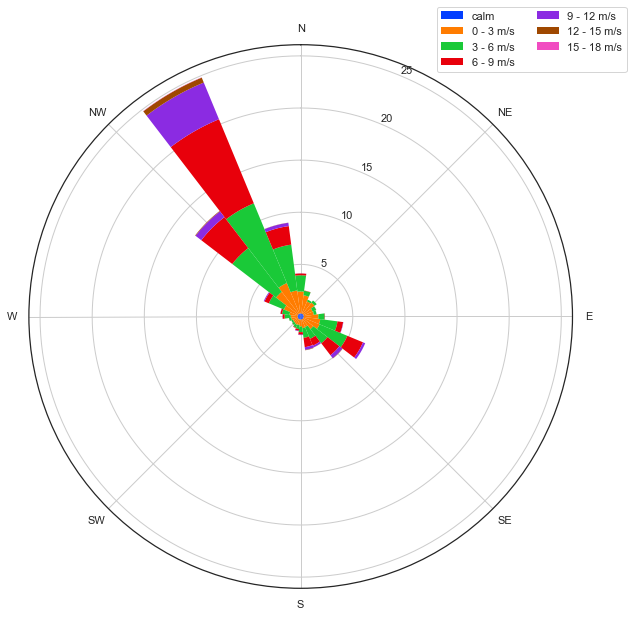

In [80]:
directions = np.arange(0, 360, 15)
fig = wind_rose(rose1, directions)

In [81]:
is_375 = df['wsid'] == 375
wsid_375 = df[is_375]

rose2 = (
    wsid_375.assign(WindSpd_bins=lambda df:
            pd.cut(df['wdsp'], bins=spd_bins, labels=spd_labels, right=True)
         )
        .assign(WindDir_bins=lambda df:
            pd.cut(df['wdct'], bins=dir_bins, labels=dir_labels, right=False)
         )
        .replace({'WindDir_bins': {360: 0}})
        .groupby(by=['WindSpd_bins', 'WindDir_bins'])
        .size()
        .unstack(level='WindSpd_bins')
        .fillna(0)
        .assign(calm=lambda df: calm_count / df.shape[0])
        .sort_index(axis=1)
        .applymap(lambda x: x / total_count * 100)
)

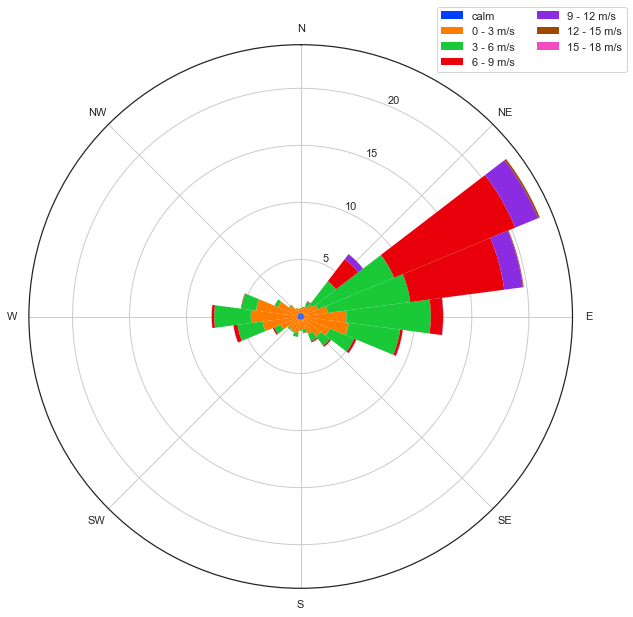

In [82]:
fig = wind_rose(rose2, directions)